# ***PRÁCTICA 3***

# **Carga de librerías y datos**

## *Carga de librerias*

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn.compose
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import tensorflow as tf
import tensorflow.keras as K
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from keras import backend as Ke
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
import nltk
nltk.download("popular") # required to download the stopwords lists
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import sys
import multiprocessing
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.model_selection import PredefinedSplit

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

## *Carga de datos*

In [2]:
data = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/okcupid_profiles.csv", sep=",")
data

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, i

## *Copia de los datos de entrada para el preprocesamiento*

In [3]:
X = data.copy()
X

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, i

# **Estudio inicial**

In [ ]:
data

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, i

Se ven los tipos de cada columna

In [ ]:
data.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object


Se describen los datos correspondientes a cada columna.


In [ ]:
data.describe(include="all")

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
count,59946.000000,59946,59946,59946,54650,35551,56961,45866,53318,54266,59943.000000,59946.000000,51748,59946,59946,24385,40025,39720,48890,54434,59896,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343
unique,NaN,5,2,3,12,18,6,3,32,217,NaN,NaN,21,30123,199,15,15,45,48,5,7647,54347,51516,48625,43520,49257,48961,43583,45548,39323,45440
top,NaN,single,m,straight,average,mostly anything,socially,never,graduated from college/university,white,NaN,NaN,other,2012-06-29-22-56,"san francisco, california",doesn't have kids,likes dogs and likes cats,agnosticism,gemini and it&rsquo;s fun to think about,no,english,.,enjoying it.,listening,my smile,ask me,ask me,my future,out with friends,ask me,you want to.
freq,NaN,55697,35829,51606,14652,16585,41780,37724,23959,32831,NaN,NaN,7589,24,31064,7560,14814,2724,1782,43896,21828,12,61,82,529,16,6,161,89,45,200
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,20033.222534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,97346.192104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Métodos auxiliares**

## *Guardar DataFrame*

In [4]:
def guardar(dataframe, nombre='dataframe', ruta='/content'):
  try:
    os.mkdir(ruta)
  except:
    pass

  nombre = ruta + '/'+ nombre + '.csv'
  dataframe.to_csv(nombre, index=False)

## *Preprocesamiento*

In [5]:
# Se eliminan las filas indicadas por parámetro
def eliminate_lines(X, indexes):
  X.drop(index=indexes, inplace=True)
  X.reset_index(drop=True, inplace=True)

In [6]:
# Se extraen todos los elementos de una columna y el número de veces que se repiten
def count(column):
  conteo = dict()
  for elem in column:
    if elem in conteo:
      conteo[elem] += 1
    else:
      conteo[elem] = 1
  return conteo

In [9]:
# Se extraen todos los elementos de una columna y el porcentaje de veces que se repiten
def count_percent(column):
  count_data = count(column)
  total = 0.0
  conteo = dict()
  for el in count_data:
    total += count_data[el]
  for el in count_data:
    conteo[el] = (count_data[el]/total)*100.0
  return conteo

In [7]:
# Devuelve los índices de las filas que contienen uno de los valores indicados en los parámetros
def indexes_of_row_value(column, values):
  indexes = []
  for i in range(0,len(column)):
    for value in values:
      if column[i] == value:
        indexes.append(i)
  return indexes

In [8]:
# Devuelve los índices de las filas que contienen valores vacíos de una columna indicada por parámetro
def indexes_of_empty_values(column):
  indexes = []
  for i in range(0, len(column)):
    if pd.isna(column[i]):
      indexes.append(i)
  return indexes

In [10]:
# Dada una columna, unos índices y unos valores, cambia el valor de las casillas por los valores pasados por parámetro.
def set_new_values_on_indexes(column, indexes, value):
  for i in indexes:
    column[i]=value

In [11]:
# Dada una columna devuelve los diferentes tipos de elementos que se encuentran en ella en un set.
def extract_types(column):
  tipos = set()
  for el in column:
    subtipos = el.split(',')
    for sub in subtipos:
      tipos.add(sub.strip())
  return tipos

In [12]:
# Dado un set de datos, una de las columnas y unos tipos, se divide dicha columna en otras columnas nuevas indicadas por parámetro.
def divide_column_in_types(data, column, types):
  for tipo in types:
    data[tipo] = column.apply(lambda x:x==tipo)

## *Representación y valoración del Clustering*

In [13]:
def representar(X, labels=[], cmap='brg'): #Representar en 2D un dataframe
  plt.figure(figsize=(10, 10))
  if(len(labels)>0):
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=cmap)
  else:
    plt.scatter(X[:,0], X[:,1], cmap=cmap)
  plt.xticks([]), plt.yticks([]) # desactivacion de las marcas de los ejes

In [14]:
def silhouette(estimator, X): #Cálculo de la medida de calidad silhouette
    clusters = estimator.fit_predict(X)
    score = silhouette_score(X, clusters)
    return score

# **Estudio y preprocesamiento de cada columna (no texto)**


## *Columna Age (numérica)*

In [ ]:
columnName = 'age'

In [ ]:
indexes_of_empty_values(X[columnName]) #Índices de las columnas vacías

[]

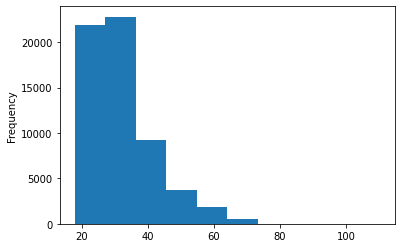

In [ ]:
X[columnName].plot(kind='hist')

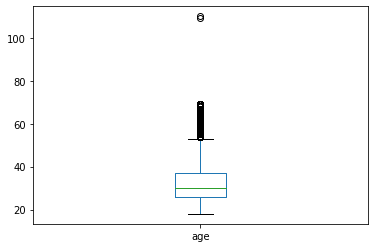

In [ ]:
X[columnName].plot(kind='box')

In [ ]:
count(X[columnName]) #Muestra todos los diferentes valores de esta columna y el número de veces que se repite

{18: 309,
 19: 611,
 20: 953,
 21: 1282,
 22: 1934,
 23: 2592,
 24: 3242,
 25: 3531,
 26: 3724,
 27: 3685,
 28: 3583,
 29: 3295,
 30: 3149,
 31: 2735,
 32: 2587,
 33: 2206,
 34: 1902,
 35: 1755,
 36: 1583,
 37: 1427,
 38: 1330,
 39: 1172,
 40: 1030,
 41: 980,
 42: 1072,
 43: 858,
 44: 708,
 45: 643,
 46: 578,
 47: 529,
 48: 481,
 49: 459,
 50: 437,
 51: 350,
 52: 344,
 53: 252,
 54: 267,
 55: 265,
 56: 271,
 57: 256,
 58: 197,
 59: 221,
 60: 195,
 61: 176,
 62: 167,
 63: 138,
 64: 113,
 65: 109,
 66: 105,
 67: 66,
 68: 59,
 69: 31,
 109: 1,
 110: 1}

In [ ]:
eliminate_lines(X, indexes_of_row_value(X[columnName], [109, 110]))

In [ ]:
count(X[columnName])

{18: 309,
 19: 611,
 20: 953,
 21: 1282,
 22: 1934,
 23: 2592,
 24: 3242,
 25: 3531,
 26: 3724,
 27: 3685,
 28: 3583,
 29: 3295,
 30: 3149,
 31: 2735,
 32: 2587,
 33: 2206,
 34: 1902,
 35: 1755,
 36: 1583,
 37: 1427,
 38: 1330,
 39: 1172,
 40: 1030,
 41: 980,
 42: 1072,
 43: 858,
 44: 708,
 45: 643,
 46: 578,
 47: 529,
 48: 481,
 49: 459,
 50: 437,
 51: 350,
 52: 344,
 53: 252,
 54: 267,
 55: 265,
 56: 271,
 57: 256,
 58: 197,
 59: 221,
 60: 195,
 61: 176,
 62: 167,
 63: 138,
 64: 113,
 65: 109,
 66: 105,
 67: 66,
 68: 59,
 69: 31}

In [ ]:
count_percent(X[columnName]) #Muestra todos los diferentes valores de esta columna y el porcentaje de veces que se repite

{18: 0.5154811157079942,
 19: 1.0192846656879755,
 20: 1.589817162685173,
 21: 2.138662751901775,
 22: 3.2263445882823967,
 23: 4.3240357667156015,
 24: 5.408381155745362,
 25: 5.890497797944748,
 26: 6.212464967302815,
 27: 6.147404243961031,
 28: 5.977245429067129,
 29: 5.496797010543173,
 30: 5.253236353930335,
 31: 4.562591752302149,
 32: 4.315694648338449,
 33: 3.6801014279994657,
 34: 3.1729614306686242,
 35: 2.9277325503803553,
 36: 2.640798078206326,
 37: 2.3805551848391833,
 38: 2.2187374883224344,
 39: 1.9551581476044306,
 40: 1.7182703856933137,
 41: 1.6348592019217938,
 42: 1.7883357800613908,
 43: 1.4313359135192847,
 44: 1.1811023622047243,
 45: 1.0726678233017484,
 46: 0.9642332843987722,
 47: 0.8824903243026825,
 48: 0.8024155878820232,
 49: 0.7657146670225543,
 50: 0.7290137461630856,
 51: 0.5838782864006407,
 52: 0.5738689443480582,
 53: 0.4203923662084612,
 54: 0.44541572133991725,
 55: 0.44207927398905644,
 56: 0.45208861604163886,
 57: 0.4270652609101829,
 58: 0.32

## *Columna Status (categórica)*

In [ ]:
columnName = 'status'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

0


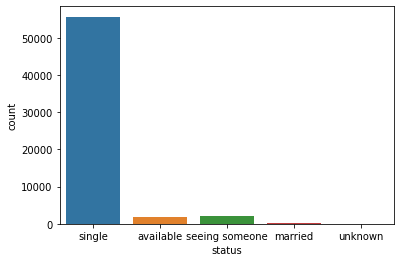

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'available': 1864,
 'married': 310,
 'seeing someone': 2064,
 'single': 55696,
 'unknown': 10}

In [ ]:
count_percent(X[columnName])

{'available': 3.109568931002269,
 'married': 0.5171493393834246,
 'seeing someone': 3.443213666088349,
 'single': 92.91338582677166,
 'unknown': 0.016682236754304018}

In [ ]:
indexes_of_row_value(X[columnName], ['unknown'])

[17336, 20366, 31146, 32846, 38007, 42769, 45883, 47997, 50955, 57299]

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 1864, 1.0: 310, 2.0: 2064, 3.0: 55696, 4.0: 10}

## *Columna Sex (categórica)*

In [ ]:
columnName = 'sex'

In [ ]:
indexes_of_empty_values(X[columnName])

[]

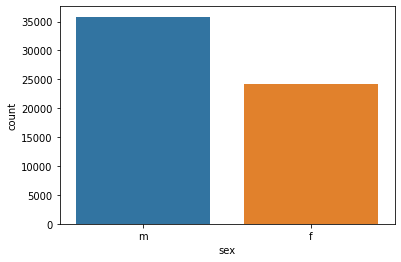

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'f': 24116, 'm': 35828}

In [ ]:
count_percent(X[columnName])

{'f': 40.23088215667956, 'm': 59.76911784332043}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 24116, 1.0: 35828}

## *Columna Orientation (categórica)*

In [ ]:
columnName = 'orientation'

In [ ]:
indexes_of_empty_values(X[columnName])

[]

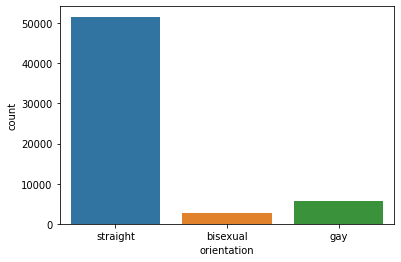

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'bisexual': 2767, 'gay': 5573, 'straight': 51604}

In [ ]:
count_percent(X[columnName])

{'bisexual': 4.615974909915922,
 'gay': 9.297010543173629,
 'straight': 86.08701454691044}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 2767, 1.0: 5573, 2.0: 51604}

## *Columna Body Type (categórica)*

In [ ]:
columnName = 'body_type'

In [ ]:
print(len(indexes_of_empty_values(X[columnName]))) #Número de filas vacías

5295


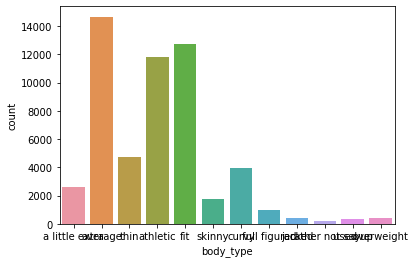

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'a little extra': 2629,
 'athletic': 11818,
 'average': 14652,
 'curvy': 3924,
 'fit': 12711,
 'full figured': 1009,
 'jacked': 421,
 nan: 5295,
 'overweight': 444,
 'rather not say': 198,
 'skinny': 1777,
 'thin': 4711,
 'used up': 355}

In [ ]:
count_percent(X[columnName])

{'a little extra': 4.385760042706526,
 'athletic': 19.71506739623649,
 'average': 24.442813292406246,
 'curvy': 6.546109702388896,
 'fit': 21.204791138395837,
 'full figured': 1.6832376885092752,
 'jacked': 0.7023221673561991,
 nan: 8.833244361403978,
 'overweight': 0.7406913118910984,
 'rather not say': 0.33030828773521953,
 'skinny': 2.9644334712398237,
 'thin': 7.859001734952622,
 'used up': 0.5922194047777927}

Transformamos los valores vacíos a 'rather not say'

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
count(X[columnName])

{'a little extra': 2629,
 'athletic': 11818,
 'average': 14652,
 'curvy': 3924,
 'fit': 12711,
 'full figured': 1009,
 'jacked': 421,
 'overweight': 444,
 'rather not say': 5493,
 'skinny': 1777,
 'thin': 4711,
 'used up': 355}

In [ ]:
count_percent(X[columnName])

{'a little extra': 4.385760042706526,
 'athletic': 19.71506739623649,
 'average': 24.442813292406246,
 'curvy': 6.546109702388896,
 'fit': 21.204791138395837,
 'full figured': 1.6832376885092752,
 'jacked': 0.7023221673561991,
 'overweight': 0.7406913118910984,
 'rather not say': 9.163552649139197,
 'skinny': 2.9644334712398237,
 'thin': 7.859001734952622,
 'used up': 0.5922194047777927}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 2629,
 1.0: 11818,
 2.0: 14652,
 3.0: 3924,
 4.0: 12711,
 5.0: 1009,
 6.0: 421,
 7.0: 444,
 8.0: 5493,
 9.0: 1777,
 10.0: 4711,
 11.0: 355}

## *Columna Diet (categórica)*

In [ ]:
columnName = 'diet'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

24394


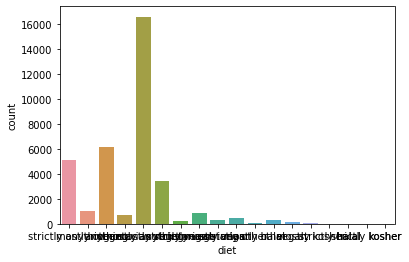

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'anything': 6183,
 'halal': 11,
 'kosher': 11,
 'mostly anything': 16585,
 'mostly halal': 48,
 'mostly kosher': 86,
 'mostly other': 1006,
 'mostly vegan': 338,
 'mostly vegetarian': 3444,
 nan: 24394,
 'other': 331,
 'strictly anything': 5113,
 'strictly halal': 18,
 'strictly kosher': 18,
 'strictly other': 452,
 'strictly vegan': 228,
 'strictly vegetarian': 875,
 'vegan': 136,
 'vegetarian': 667}

In [ ]:
count_percent(X[columnName])

{'anything': 10.314626985186173,
 'halal': 0.018350460429734417,
 'kosher': 0.018350460429734417,
 'mostly anything': 27.66748965701321,
 'mostly halal': 0.08007473642065928,
 'mostly kosher': 0.14346723608701456,
 'mostly other': 1.678233017482984,
 'mostly vegan': 0.5638596022954758,
 'mostly vegetarian': 5.745362338182304,
 nan: 40.69464833844922,
 'other': 0.552182036567463,
 'strictly anything': 8.529627652475643,
 'strictly halal': 0.030028026157747228,
 'strictly kosher': 0.030028026157747228,
 'strictly other': 0.7540371012945416,
 'strictly vegan': 0.3803549979981316,
 'strictly vegetarian': 1.4596957160016015,
 'vegan': 0.22687841985853463,
 'vegetarian': 1.112705191512078}

Transformamos los valores vacíos en 'mostly anything' al ser el tipo de dieta más común

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'mostly anything')

In [ ]:
count(X[columnName])

{'anything': 6183,
 'halal': 11,
 'kosher': 11,
 'mostly anything': 40979,
 'mostly halal': 48,
 'mostly kosher': 86,
 'mostly other': 1006,
 'mostly vegan': 338,
 'mostly vegetarian': 3444,
 'other': 331,
 'strictly anything': 5113,
 'strictly halal': 18,
 'strictly kosher': 18,
 'strictly other': 452,
 'strictly vegan': 228,
 'strictly vegetarian': 875,
 'vegan': 136,
 'vegetarian': 667}

In [ ]:
count_percent(X[columnName])

{'anything': 10.314626985186173,
 'halal': 0.018350460429734417,
 'kosher': 0.018350460429734417,
 'mostly anything': 68.36213799546243,
 'mostly halal': 0.08007473642065928,
 'mostly kosher': 0.14346723608701456,
 'mostly other': 1.678233017482984,
 'mostly vegan': 0.5638596022954758,
 'mostly vegetarian': 5.745362338182304,
 'other': 0.552182036567463,
 'strictly anything': 8.529627652475643,
 'strictly halal': 0.030028026157747228,
 'strictly kosher': 0.030028026157747228,
 'strictly other': 0.7540371012945416,
 'strictly vegan': 0.3803549979981316,
 'strictly vegetarian': 1.4596957160016015,
 'vegan': 0.22687841985853463,
 'vegetarian': 1.112705191512078}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 6183,
 1.0: 11,
 2.0: 11,
 3.0: 40979,
 4.0: 48,
 5.0: 86,
 6.0: 1006,
 7.0: 338,
 8.0: 3444,
 9.0: 331,
 10.0: 5113,
 11.0: 18,
 12.0: 18,
 13.0: 452,
 14.0: 228,
 15.0: 875,
 16.0: 136,
 17.0: 667}

## *Columna Drinks (categórica)*

In [ ]:
columnName = 'drinks'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

2983


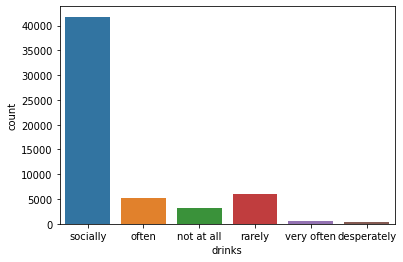

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'desperately': 322,
 nan: 2983,
 'not at all': 3267,
 'often': 5164,
 'rarely': 5957,
 'socially': 41780,
 'very often': 471}

In [ ]:
count_percent(X[columnName])

{'desperately': 0.5371680234885894,
 nan: 4.976311223808888,
 'not at all': 5.450086747631122,
 'often': 8.614707059922594,
 'rarely': 9.937608434538902,
 'socially': 69.69838515948219,
 'very often': 0.7857333511277191}

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'socially')

In [ ]:
count(X[columnName])

{'desperately': 322,
 'not at all': 3267,
 'often': 5164,
 'rarely': 5957,
 'socially': 44763,
 'very often': 471}

In [ ]:
count_percent(X[columnName])

{'desperately': 0.5371680234885894,
 'not at all': 5.450086747631122,
 'often': 8.614707059922594,
 'rarely': 9.937608434538902,
 'socially': 74.67469638329108,
 'very often': 0.7857333511277191}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 322, 1.0: 3267, 2.0: 5164, 3.0: 5957, 4.0: 44763, 5.0: 471}

## *Columna Drugs (categórica)*

In [ ]:
columnName = 'drugs'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

14079


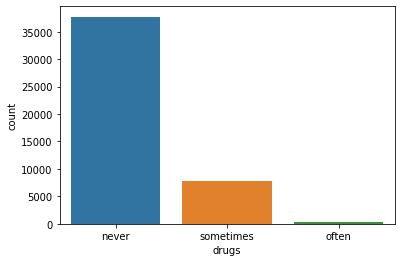

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{nan: 14079, 'never': 37723, 'often': 410, 'sometimes': 7732}

In [ ]:
count_percent(X[columnName])

{nan: 23.486921126384626,
 'never': 62.930401708261044,
 'often': 0.6839717069264647,
 'sometimes': 12.898705458427868}

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
count(X[columnName])

{'never': 37723, 'often': 410, 'rather not say': 14079, 'sometimes': 7732}

In [ ]:
count_percent(X[columnName])

{'never': 62.930401708261044,
 'often': 0.6839717069264647,
 'rather not say': 23.486921126384626,
 'sometimes': 12.898705458427868}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 37723, 1.0: 410, 2.0: 14079, 3.0: 7732}

## *Columna Education (categórica)*

In [ ]:
columnName = 'education'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

6627


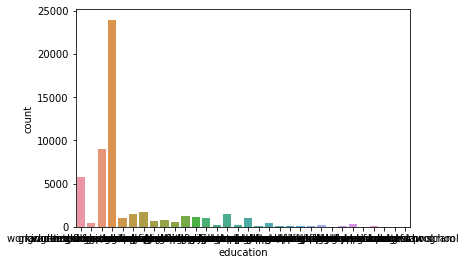

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'college/university': 801,
 'dropped out of college/university': 995,
 'dropped out of high school': 102,
 'dropped out of law school': 18,
 'dropped out of masters program': 140,
 'dropped out of med school': 12,
 'dropped out of ph.d program': 127,
 'dropped out of space camp': 523,
 'dropped out of two-year college': 191,
 'graduated from college/university': 23959,
 'graduated from high school': 1428,
 'graduated from law school': 1122,
 'graduated from masters program': 8961,
 'graduated from med school': 446,
 'graduated from ph.d program': 1272,
 'graduated from space camp': 657,
 'graduated from two-year college': 1531,
 'high school': 96,
 'law school': 19,
 'masters program': 136,
 'med school': 11,
 nan: 6627,
 'ph.d program': 26,
 'space camp': 58,
 'two-year college': 222,
 'working on college/university': 5712,
 'working on high school': 87,
 'working on law school': 269,
 'working on masters program': 1682,
 'working on med school': 212,
 'working on ph.d program': 983,

In [ ]:
count_percent(X[columnName])

{'college/university': 1.3362471640197517,
 'dropped out of college/university': 1.6598825570532498,
 'dropped out of high school': 0.17015881489390097,
 'dropped out of law school': 0.030028026157747228,
 'dropped out of masters program': 0.23355131456025627,
 'dropped out of med school': 0.02001868410516482,
 'dropped out of ph.d program': 0.211864406779661,
 'dropped out of space camp': 0.8724809822501002,
 'dropped out of two-year college': 0.3186307220072067,
 'graduated from college/university': 39.968971039637,
 'graduated from high school': 2.382223408514614,
 'graduated from law school': 1.871746963832911,
 'graduated from masters program': 14.94895235553183,
 'graduated from med school': 0.7440277592419592,
 'graduated from ph.d program': 2.121980515147471,
 'graduated from space camp': 1.0960229547577738,
 'graduated from two-year college': 2.554050447083945,
 'high school': 0.16014947284131856,
 'law school': 0.031696249833177634,
 'masters program': 0.22687841985853463,
 '

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
count(X[columnName])

{'college/university': 801,
 'dropped out of college/university': 995,
 'dropped out of high school': 102,
 'dropped out of law school': 18,
 'dropped out of masters program': 140,
 'dropped out of med school': 12,
 'dropped out of ph.d program': 127,
 'dropped out of space camp': 523,
 'dropped out of two-year college': 191,
 'graduated from college/university': 23959,
 'graduated from high school': 1428,
 'graduated from law school': 1122,
 'graduated from masters program': 8961,
 'graduated from med school': 446,
 'graduated from ph.d program': 1272,
 'graduated from space camp': 657,
 'graduated from two-year college': 1531,
 'high school': 96,
 'law school': 19,
 'masters program': 136,
 'med school': 11,
 'ph.d program': 26,
 'rather not say': 6627,
 'space camp': 58,
 'two-year college': 222,
 'working on college/university': 5712,
 'working on high school': 87,
 'working on law school': 269,
 'working on masters program': 1682,
 'working on med school': 212,
 'working on ph.d p

In [ ]:
count_percent(X[columnName])

{'college/university': 1.3362471640197517,
 'dropped out of college/university': 1.6598825570532498,
 'dropped out of high school': 0.17015881489390097,
 'dropped out of law school': 0.030028026157747228,
 'dropped out of masters program': 0.23355131456025627,
 'dropped out of med school': 0.02001868410516482,
 'dropped out of ph.d program': 0.211864406779661,
 'dropped out of space camp': 0.8724809822501002,
 'dropped out of two-year college': 0.3186307220072067,
 'graduated from college/university': 39.968971039637,
 'graduated from high school': 2.382223408514614,
 'graduated from law school': 1.871746963832911,
 'graduated from masters program': 14.94895235553183,
 'graduated from med school': 0.7440277592419592,
 'graduated from ph.d program': 2.121980515147471,
 'graduated from space camp': 1.0960229547577738,
 'graduated from two-year college': 2.554050447083945,
 'high school': 0.16014947284131856,
 'law school': 0.031696249833177634,
 'masters program': 0.22687841985853463,
 '

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 801,
 1.0: 995,
 2.0: 102,
 3.0: 18,
 4.0: 140,
 5.0: 12,
 6.0: 127,
 7.0: 523,
 8.0: 191,
 9.0: 23959,
 10.0: 1428,
 11.0: 1122,
 12.0: 8961,
 13.0: 446,
 14.0: 1272,
 15.0: 657,
 16.0: 1531,
 17.0: 96,
 18.0: 19,
 19.0: 136,
 20.0: 11,
 21.0: 26,
 22.0: 6627,
 23.0: 58,
 24.0: 222,
 25.0: 5712,
 26.0: 87,
 27.0: 269,
 28.0: 1682,
 29.0: 212,
 30.0: 983,
 31.0: 445,
 32.0: 1074}

## *Columna Ethnicity (categórica)*

In [ ]:
columnName = 'ethnicity'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

5678


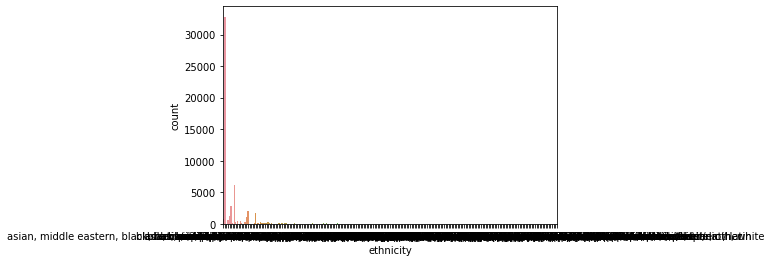

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'asian': 6134,
 'asian, black': 59,
 'asian, black, hispanic / latin': 2,
 'asian, black, hispanic / latin, other': 2,
 'asian, black, hispanic / latin, white': 2,
 'asian, black, hispanic / latin, white, other': 1,
 'asian, black, indian': 1,
 'asian, black, indian, hispanic / latin, other': 1,
 'asian, black, native american': 9,
 'asian, black, native american, hispanic / latin': 2,
 'asian, black, native american, hispanic / latin, white': 2,
 'asian, black, native american, indian': 1,
 'asian, black, native american, indian, hispanic / latin, white, other': 1,
 'asian, black, native american, indian, pacific islander, hispanic / latin': 1,
 'asian, black, native american, indian, pacific islander, white': 1,
 'asian, black, native american, other': 2,
 'asian, black, native american, pacific islander': 2,
 'asian, black, native american, pacific islander, other': 1,
 'asian, black, native american, pacific islander, white': 3,
 'asian, black, native american, pacific islander, w

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'Ethnicity: rather not say')

In [ ]:
tiposEthnicity = extract_types(X[columnName])
tiposEthnicity

{'Ethnicity: rather not say',
 'asian',
 'black',
 'hispanic / latin',
 'indian',
 'middle eastern',
 'native american',
 'other',
 'pacific islander',
 'white'}

In [ ]:
divide_column_in_types(X, X[columnName], tiposEthnicity)
X.drop(columns=columnName, inplace=True)
X

,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,pacific islander,asian,black,middle eastern,indian,native american,other,Ethnicity: rather not say,hispanic / latin,white
0,25,0,4,10,0,2,1,3,22,75,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,False,False,False,False,False,False,False,False,False,False
1,31,3,2,6,2,2,1,3,35,70,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,False,False,False,False,False,False,False,False,False,True
2,12,2,4,0,10,2,1,0,38,68,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",False,False,False,False,False,False,False,True,False,False
3,25,2,4,17,10,2,1,3,23,71,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,False,False,False,False,False,False,False,False,False,True
4,9,0,4,3,1,2,1,3,29,66,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59939,9,0,4,3,8,2,0,3,59,62,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy

In [ ]:
for columnName in tiposEthnicity:
  column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
  ], remainder = 'passthrough');

  columns = X.columns
  columns = columns.drop(columnName)
  columns = np.append([columnName], columns)

  X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)
  print(count(X[columnName]))

{0.0: 59512, 1.0: 432}
{0.0: 53810, 1.0: 6134}
{0.0: 57936, 1.0: 2008}
{0.0: 59615, 1.0: 329}
{0.0: 58867, 1.0: 1077}
{0.0: 59877, 1.0: 67}
{0.0: 58238, 1.0: 1706}
{0.0: 54266, 1.0: 5678}
{0.0: 57121, 1.0: 2823}
{0.0: 27113, 1.0: 32831}


## *Columna Height (numérica)*

In [ ]:
columnName = 'height'

In [ ]:
indexes_of_empty_values(X[columnName])

[36426, 54000, 58981]

In [ ]:
aux = pd.DataFrame(data=(X[2535:2536]), columns=X.columns) #Se va a eliminar esta fila porque está casi toda incompleta
aux = aux.append(X[25691:25692], ignore_index=True) #Se rellena con la media de personas de su mismo sexo y lugar de residencia
aux = aux.append(X[52312:52313], ignore_index=True) #Se va a eliminar esta fila porque está casi toda incompleta
aux

,white,hispanic / latin,Ethnicity: rather not say,other,native american,indian,middle eastern,black,asian,pacific islander,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,1,0,0,0,0,0,0,0,0,0,22,0,4,3,3,2,0,3,39,62,-1,sales / marketing / biz dev,2012-06-16-09-56,"san francisco, california",NaN,likes dogs and likes cats,NaN,virgo,no,english,"in a nutshell, i'm pretty outgoing and undenia...",i manage events for a technology company in sf...,that's for me to know and you to find out. if ...,my smile : ),"books: hunger games, the girl w/ the dragon ta...","my amazing friends, my personal trainer, good ...","my next vacation, which will be surfing in cos...",having a well deserved drink with good friends...,i have read every harry potter and twilight bo...,you are all about the witty banter and are bra...
1,0,0,0,0,0,0,0,0,1,0,12,0,3,3,2,2,0,3,29,62,-1,medicine / health,2012-06-30-18-36,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and very serious about it,libra and it&rsquo;s fun to think about,no,"english (fluently), korean (poorly)",i came to sf a few years ago for graduate scho...,"trying to find you, duh.","interrupting. it's not to be rude, i just have...","my teeth. very straight. yes, braces.",book: the good girl's guide to getting lost mo...,laptop running shoes ipod coffee friends/famil...,what is the next fun/adventurous/different thi...,usually at home or working.,you'll never guess where i have tattoos.,you're attracted to me and you're funny (and o...
2,1,0,0,0,0,0,0,0,0,0,9,2,4,0,10,2,0,3,35,66,-1,executive / management,2012-06-30-16-15,"san francisco, california",NaN,likes dogs,NaN,aquarius but it doesn&rsquo;t matter,no,"english, spanish (fluently)","i'm an ambitious, passionate, slightly geeky, ...","i'm relatively new to san francisco, having mo...",reading maps... i love them. literally love th...,i have a big smile and like to use it. i love...,"i'm all about my favourite books, movies, show...",1. regular massages. men with large and willin...,the meaning of significant moments in great bo...,NaN,"well, it's not private, but i'll admit that i'...",you haven't put 'never' next to the drugs prof...


In [ ]:
X[columnName][25691] = round((( X[X['sex']==X['sex'][25691]] )[X['location']==X['location'][25691]] )[columnName].mean())
X[25691:25692] #Se rellena con la media de personas de su mismo sexo y lugar de residencia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,white,hispanic / latin,Ethnicity: rather not say,other,native american,indian,middle eastern,black,asian,pacific islander,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
25691,0,0,0,0,0,0,0,0,1,0,12,0,3,3,2,2,0,3,29,65,-1,medicine / health,2012-06-30-18-36,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and very serious about it,libra and it&rsquo;s fun to think about,no,"english (fluently), korean (poorly)",i came to sf a few years ago for graduate scho...,"trying to find you, duh.","interrupting. it's not to be rude, i just have...","my teeth. very straight. yes, braces.",book: the good girl's guide to getting lost mo...,laptop running shoes ipod coffee friends/famil...,what is the next fun/adventurous/different thi...,usually at home or working.,you'll never guess where i have tattoos.,you're attracted to me and you're funny (and o...


In [ ]:
eliminate_lines(X, [2535, 52312]) #Se eliminan estas filas porque están casi incompletas 
indexes_of_empty_values(X[columnName])

[36425, 53998, 58979]

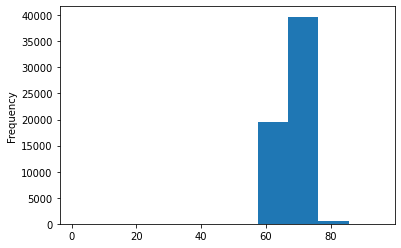

In [ ]:
X[columnName].plot(kind='hist')

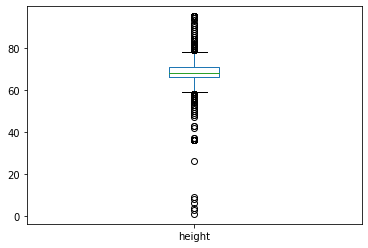

In [ ]:
X[columnName].plot(kind='box')

In [ ]:
count(X[columnName])

{1.0: 1,
 3.0: 1,
 4.0: 1,
 6.0: 1,
 8.0: 1,
 9.0: 1,
 26.0: 1,
 36.0: 11,
 37.0: 2,
 42.0: 1,
 43.0: 2,
 47.0: 1,
 48.0: 2,
 49.0: 1,
 50.0: 2,
 51.0: 1,
 52.0: 1,
 53.0: 5,
 54.0: 3,
 55.0: 6,
 56.0: 8,
 57.0: 17,
 58.0: 53,
 59.0: 212,
 60.0: 791,
 61.0: 1090,
 62.0: 2242,
 63.0: 2767,
 64.0: 3865,
 65.0: 3795,
 66.0: 4758,
 67.0: 5353,
 68.0: 5449,
 69.0: 5179,
 70.0: 6074,
 71.0: 4826,
 72.0: 5315,
 73.0: 2815,
 74.0: 2547,
 75.0: 1382,
 76.0: 783,
 77.0: 280,
 78.0: 132,
 79.0: 57,
 80.0: 27,
 81.0: 11,
 82.0: 11,
 83.0: 12,
 84.0: 9,
 85.0: 1,
 86.0: 1,
 87.0: 1,
 88.0: 2,
 89.0: 1,
 90.0: 1,
 91.0: 3,
 92.0: 1,
 93.0: 1,
 94.0: 3,
 95.0: 19,
 nan: 1,
 nan: 1,
 nan: 1}

In [ ]:
count_percent(X[columnName])

{1.0: 0.0016682793366921357,
 3.0: 0.0016682793366921357,
 4.0: 0.0016682793366921357,
 6.0: 0.0016682793366921357,
 8.0: 0.0016682793366921357,
 9.0: 0.0016682793366921357,
 26.0: 0.0016682793366921357,
 36.0: 0.018351072703613493,
 37.0: 0.0033365586733842714,
 42.0: 0.0016682793366921357,
 43.0: 0.0033365586733842714,
 47.0: 0.0016682793366921357,
 48.0: 0.0033365586733842714,
 49.0: 0.0016682793366921357,
 50.0: 0.0033365586733842714,
 51.0: 0.0016682793366921357,
 52.0: 0.0016682793366921357,
 53.0: 0.008341396683460678,
 54.0: 0.005004838010076408,
 55.0: 0.010009676020152816,
 56.0: 0.013346234693537086,
 57.0: 0.02836074872376631,
 58.0: 0.08841880484468319,
 59.0: 0.35367521937873275,
 60.0: 1.3196089553234793,
 61.0: 1.818424476994428,
 62.0: 3.740282272863768,
 63.0: 4.616128924627139,
 64.0: 6.447899636315105,
 65.0: 6.331120082746655,
 66.0: 7.937673083981182,
 67.0: 8.930299289313002,
 68.0: 9.090454105635448,
 69.0: 8.64001868472857,
 70.0: 10.133128691068032,
 71.0: 8.0

## *Columna Job (categórica)*

Se analiza antes que Income porque para modificar los valores de income se necesita que todos los valores de la columna Job no sean nulos.

In [ ]:
columnName = 'job'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

8197


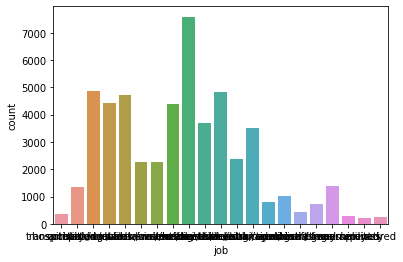

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'artistic / musical / writer': 4439,
 'banking / financial / real estate': 2266,
 'clerical / administrative': 805,
 'computer / hardware / software': 4709,
 'construction / craftsmanship': 1021,
 'education / academia': 3513,
 'entertainment / media': 2250,
 'executive / management': 2372,
 'hospitality / travel': 1364,
 'law / legal services': 1381,
 'medicine / health': 3680,
 'military': 204,
 nan: 8197,
 'other': 7589,
 'political / government': 708,
 'rather not say': 436,
 'retired': 250,
 'sales / marketing / biz dev': 4390,
 'science / tech / engineering': 4848,
 'student': 4881,
 'transportation': 366,
 'unemployed': 273}

In [ ]:
count_percent(X[columnName])

{'artistic / musical / writer': 7.405491975576391,
 'banking / financial / real estate': 3.7803209769443797,
 'clerical / administrative': 1.3429648660371691,
 'computer / hardware / software': 7.855927396483267,
 'construction / craftsmanship': 1.7033132027626705,
 'education / academia': 5.860665309799472,
 'entertainment / media': 3.753628507557306,
 'executive / management': 3.9571585866337458,
 'hospitality / travel': 2.275533015248073,
 'law / legal services': 2.3038937639718395,
 'medicine / health': 6.13926795902706,
 'military': 0.3403289846851957,
 nan: 13.674885722865437,
 'other': 12.66057188615662,
 'political / government': 1.1811417703780323,
 'rather not say': 0.7273697907977712,
 'retired': 0.4170698341730339,
 'sales / marketing / biz dev': 7.323746288078476,
 'science / tech / engineering': 8.087818224283474,
 'student': 8.142871442394314,
 'transportation': 0.6105902372293217,
 'unemployed': 0.45544025891695306}

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
count(X[columnName])

{'artistic / musical / writer': 4439,
 'banking / financial / real estate': 2266,
 'clerical / administrative': 805,
 'computer / hardware / software': 4709,
 'construction / craftsmanship': 1021,
 'education / academia': 3513,
 'entertainment / media': 2250,
 'executive / management': 2372,
 'hospitality / travel': 1364,
 'law / legal services': 1381,
 'medicine / health': 3680,
 'military': 204,
 'other': 7589,
 'political / government': 708,
 'rather not say': 8633,
 'retired': 250,
 'sales / marketing / biz dev': 4390,
 'science / tech / engineering': 4848,
 'student': 4881,
 'transportation': 366,
 'unemployed': 273}

In [ ]:
count_percent(X[columnName])

{'artistic / musical / writer': 7.405491975576391,
 'banking / financial / real estate': 3.7803209769443797,
 'clerical / administrative': 1.3429648660371691,
 'computer / hardware / software': 7.855927396483267,
 'construction / craftsmanship': 1.7033132027626705,
 'education / academia': 5.860665309799472,
 'entertainment / media': 3.753628507557306,
 'executive / management': 3.9571585866337458,
 'hospitality / travel': 2.275533015248073,
 'law / legal services': 2.3038937639718395,
 'medicine / health': 6.13926795902706,
 'military': 0.3403289846851957,
 'other': 12.66057188615662,
 'political / government': 1.1811417703780323,
 'rather not say': 14.40225551366321,
 'retired': 0.4170698341730339,
 'sales / marketing / biz dev': 7.323746288078476,
 'science / tech / engineering': 8.087818224283474,
 'student': 8.142871442394314,
 'transportation': 0.6105902372293217,
 'unemployed': 0.45544025891695306}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 4439,
 1.0: 2266,
 2.0: 805,
 3.0: 4709,
 4.0: 1021,
 5.0: 3513,
 6.0: 2250,
 7.0: 2372,
 8.0: 1364,
 9.0: 1381,
 10.0: 3680,
 11.0: 204,
 12.0: 7589,
 13.0: 708,
 14.0: 8633,
 15.0: 250,
 16.0: 4390,
 17.0: 4848,
 18.0: 4881,
 19.0: 366,
 20.0: 273}

## *Columna Location (categórica)*

Se analiza antes que Income porque para modificar los valores de income se necesita que todos los valores de la columna Location estén preprocesados.

In [ ]:
columnName = 'location'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

0


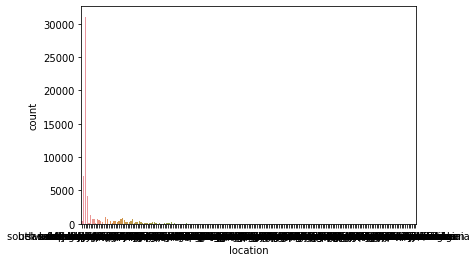

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
X['state'] = X[columnName].apply(lambda x:x.split(', ')[1])
X['location'] = X[columnName].apply(lambda x:x.split(', ')[0])

In [ ]:
count(X['location'])

{'alameda': 910,
 'albany': 233,
 'amsterdam': 1,
 'arcadia': 1,
 'asheville': 1,
 'ashland': 1,
 'astoria': 1,
 'atherton': 45,
 'atlanta': 2,
 'austin': 1,
 'bayshore': 3,
 'bellingham': 1,
 'bellwood': 1,
 'belmont': 243,
 'belvedere tiburon': 57,
 'benicia': 203,
 'berkeley': 4212,
 'billings': 1,
 'boise': 1,
 'bolinas': 8,
 'bonaduz': 1,
 'boston': 2,
 'boulder': 1,
 'brea': 1,
 'brisbane': 38,
 'brooklyn': 3,
 'burlingame': 361,
 'cambridge': 1,
 'campbell': 1,
 'canyon': 1,
 'canyon country': 1,
 'castro valley': 345,
 'chicago': 6,
 'chico': 1,
 'cincinnati': 1,
 'colma': 7,
 'columbus': 1,
 'concord': 1,
 'cork': 1,
 'corte madera': 76,
 'costa mesa': 1,
 'crockett': 32,
 'crowley': 1,
 'daly city': 680,
 'denver': 1,
 'east palo alto': 13,
 'edinburgh': 1,
 'el cerrito': 325,
 'el granada': 27,
 'el sobrante': 137,
 'emeryville': 738,
 'fairfax': 121,
 'fayetteville': 1,
 'forest knolls': 2,
 'fort lauderdale': 1,
 'foster city': 24,
 'freedom': 1,
 'fremont': 90,
 'glencove

In [ ]:
count_percent(X['location'])

{'alameda': 1.5181341963898436,
 'albany': 0.38870908544926763,
 'amsterdam': 0.0016682793366921357,
 'arcadia': 0.0016682793366921357,
 'asheville': 0.0016682793366921357,
 'ashland': 0.0016682793366921357,
 'astoria': 0.0016682793366921357,
 'atherton': 0.0750725701511461,
 'atlanta': 0.0033365586733842714,
 'austin': 0.0016682793366921357,
 'bayshore': 0.005004838010076408,
 'bellingham': 0.0016682793366921357,
 'bellwood': 0.0016682793366921357,
 'belmont': 0.405391878816189,
 'belvedere tiburon': 0.09509192219145174,
 'benicia': 0.33866070534850357,
 'berkeley': 7.026792566147276,
 'billings': 0.0016682793366921357,
 'boise': 0.0016682793366921357,
 'bolinas': 0.013346234693537086,
 'bonaduz': 0.0016682793366921357,
 'boston': 0.0033365586733842714,
 'boulder': 0.0016682793366921357,
 'brea': 0.0016682793366921357,
 'brisbane': 0.06339461479430115,
 'brooklyn': 0.005004838010076408,
 'burlingame': 0.6022488405458609,
 'cambridge': 0.0016682793366921357,
 'campbell': 0.001668279336

In [ ]:
count(X['state'])

{'arizona': 3,
 'british columbia': 1,
 'california': 59851,
 'colorado': 2,
 'connecticut': 1,
 'district of columbia': 2,
 'florida': 3,
 'georgia': 2,
 'germany': 1,
 'hawaii': 2,
 'idaho': 1,
 'illinois': 8,
 'ireland': 1,
 'louisiana': 1,
 'massachusetts': 5,
 'mexico': 1,
 'michigan': 4,
 'minnesota': 2,
 'mississippi': 1,
 'missouri': 1,
 'montana': 1,
 'netherlands': 1,
 'nevada': 1,
 'new jersey': 1,
 'new york': 17,
 'north carolina': 1,
 'ohio': 2,
 'oregon': 4,
 'pennsylvania': 1,
 'rhode island': 1,
 'spain': 2,
 'switzerland': 1,
 'tennessee': 1,
 'texas': 4,
 'united kingdom': 2,
 'utah': 2,
 'vietnam': 1,
 'virginia': 2,
 'washington': 2,
 'west virginia': 1,
 'wisconsin': 1}

In [ ]:
count_percent(X['state'])

{'arizona': 0.005004838010076408,
 'british columbia': 0.0016682793366921357,
 'california': 99.84818658036102,
 'colorado': 0.0033365586733842714,
 'connecticut': 0.0016682793366921357,
 'district of columbia': 0.0033365586733842714,
 'florida': 0.005004838010076408,
 'georgia': 0.0033365586733842714,
 'germany': 0.0016682793366921357,
 'hawaii': 0.0033365586733842714,
 'idaho': 0.0016682793366921357,
 'illinois': 0.013346234693537086,
 'ireland': 0.0016682793366921357,
 'louisiana': 0.0016682793366921357,
 'massachusetts': 0.008341396683460678,
 'mexico': 0.0016682793366921357,
 'michigan': 0.006673117346768543,
 'minnesota': 0.0033365586733842714,
 'mississippi': 0.0016682793366921357,
 'missouri': 0.0016682793366921357,
 'montana': 0.0016682793366921357,
 'netherlands': 0.0016682793366921357,
 'nevada': 0.0016682793366921357,
 'new jersey': 0.0016682793366921357,
 'new york': 0.02836074872376631,
 'north carolina': 0.0016682793366921357,
 'ohio': 0.0033365586733842714,
 'oregon': 0

In [ ]:
columnName = 'state'
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 3,
 1.0: 1,
 2.0: 59851,
 3.0: 2,
 4.0: 1,
 5.0: 2,
 6.0: 3,
 7.0: 2,
 8.0: 1,
 9.0: 2,
 10.0: 1,
 11.0: 8,
 12.0: 1,
 13.0: 1,
 14.0: 5,
 15.0: 1,
 16.0: 4,
 17.0: 2,
 18.0: 1,
 19.0: 1,
 20.0: 1,
 21.0: 1,
 22.0: 1,
 23.0: 1,
 24.0: 17,
 25.0: 1,
 26.0: 2,
 27.0: 4,
 28.0: 1,
 29.0: 1,
 30.0: 2,
 31.0: 1,
 32.0: 1,
 33.0: 4,
 34.0: 2,
 35.0: 2,
 36.0: 1,
 37.0: 2,
 38.0: 2,
 39.0: 1,
 40.0: 1}

In [ ]:
columnName = 'location'
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 910,
 1.0: 233,
 2.0: 1,
 3.0: 1,
 4.0: 1,
 5.0: 1,
 6.0: 1,
 7.0: 45,
 8.0: 2,
 9.0: 1,
 10.0: 3,
 11.0: 1,
 12.0: 1,
 13.0: 243,
 14.0: 57,
 15.0: 203,
 16.0: 4212,
 17.0: 1,
 18.0: 1,
 19.0: 8,
 20.0: 1,
 21.0: 2,
 22.0: 1,
 23.0: 1,
 24.0: 38,
 25.0: 3,
 26.0: 361,
 27.0: 1,
 28.0: 1,
 29.0: 1,
 30.0: 1,
 31.0: 345,
 32.0: 6,
 33.0: 1,
 34.0: 1,
 35.0: 7,
 36.0: 1,
 37.0: 1,
 38.0: 1,
 39.0: 76,
 40.0: 1,
 41.0: 32,
 42.0: 1,
 43.0: 680,
 44.0: 1,
 45.0: 13,
 46.0: 1,
 47.0: 325,
 48.0: 27,
 49.0: 137,
 50.0: 738,
 51.0: 121,
 52.0: 1,
 53.0: 2,
 54.0: 1,
 55.0: 24,
 56.0: 1,
 57.0: 90,
 58.0: 1,
 59.0: 1,
 60.0: 1,
 61.0: 87,
 62.0: 1,
 63.0: 1,
 64.0: 99,
 65.0: 747,
 66.0: 117,
 67.0: 1,
 68.0: 4,
 69.0: 1,
 70.0: 2,
 71.0: 1,
 72.0: 1,
 73.0: 1,
 74.0: 1,
 75.0: 1,
 76.0: 2,
 77.0: 18,
 78.0: 1,
 79.0: 180,
 80.0: 10,
 81.0: 1,
 82.0: 80,
 83.0: 1,
 84.0: 1,
 85.0: 1,
 86.0: 1,
 87.0: 2,
 88.0: 1,
 89.0: 10,
 90.0: 2,
 91.0: 2,
 92.0: 1,
 93.0: 1,
 94.0: 316,
 95.0: 479,


## *Columna Income (numérica)*

In [ ]:
columnName = 'income'

In [ ]:
indexes_of_empty_values(X[columnName])

[]

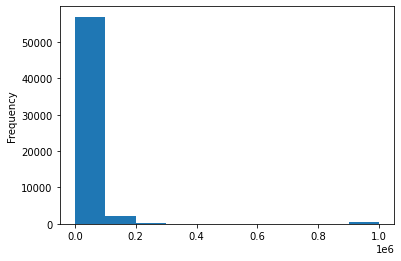

In [ ]:
X[columnName].plot(kind='hist')

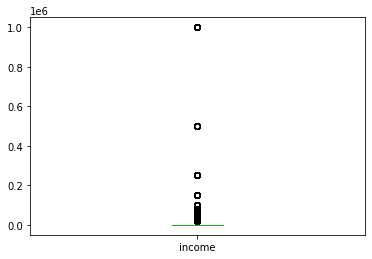

In [ ]:
X[columnName].plot(kind='box')

In [ ]:
count(X[columnName])

{-1: 48438,
 20000: 2952,
 30000: 1048,
 40000: 1005,
 50000: 975,
 60000: 736,
 70000: 707,
 80000: 1111,
 100000: 1621,
 150000: 631,
 250000: 149,
 500000: 48,
 1000000: 521}

In [ ]:
warnings.filterwarnings("ignore")
indexes = indexes_of_row_value(X[columnName], [-1])
aux = X.copy() #Se crea una copia para que no tenga en cuenta los valores rellenos en las filas anteriores
for index in indexes: #Se rellena con la media de personas de su mismo empleo y lugar de residencia
  if(aux[columnName][index] == -1):
    aux[columnName][index] = ((X[X['job']==X['job'][index]])[X['income']!=-1])[columnName].mode().mean()
X = aux
warnings.filterwarnings("default")
X

,location,state,job,white,hispanic / latin,Ethnicity: rather not say,other,native american,indian,middle eastern,black,asian,pacific islander,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,last_online,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,174,2,19,0,0,0,0,0,0,0,0,0,0,25,0,4,10,0,2,1,3,22,75,20000,2012-06-28-20-30,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,117,2,8,1,0,0,0,0,0,0,0,0,0,31,3,2,6,2,2,1,3,35,70,80000,2012-06-29-21-41,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,154,2,14,0,0,1,0,0,0,0,0,0,0,12,2,4,0,10,2,1,0,38,68,20000,2012-06-27-09-10,NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,16,2,18,1,0,0,0,0,0,0,0,0,0,25,2,4,17,10,2,1,3,23,71,20000,2012-06-28-14-22,doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,154,2,0,0,0,0,0,0,0,0,0,0,0,9,0,4,3,1,2,1,3,29,66,20000,2012-06-27-21-26,NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,117,2,16,0,0,1,0,0,0,0,0,0,0,9,0,4,3,8,2,0,3,59,62,20000,2012-06-12-21-47,has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59938,154,2,6,0,0,0,0,0,0,0,0,0,0,25,3,2,3,4,2,1,3,24,72,20000,2012-06-29-11-01,doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,engli

In [ ]:
count(X[columnName])

{20000.0: 35435,
 30000: 1048,
 40000: 1111,
 50000: 975,
 60000.0: 3767,
 70000: 707,
 80000: 1624,
 100000.0: 13926,
 150000: 631,
 250000: 149,
 500000: 48,
 1000000: 521}

In [ ]:
count_percent(X[columnName])

{20000.0: 59.11547829568583,
 30000: 1.7483567448533583,
 40000: 1.8534583430649627,
 50000: 1.6265723532748324,
 60000.0: 6.2844082613192755,
 70000: 1.17947349104134,
 80000: 2.7092856427880285,
 100000.0: 23.23245804277468,
 150000: 1.0526842614527376,
 250000: 0.24857362116712822,
 500000: 0.08007740816122252,
 1000000: 0.8691735344166026}

## *Columna Last Online (categórica)*

In [ ]:
columnName = 'last_online'

In [ ]:
indexes_of_empty_values(X[columnName])

[]

In [ ]:
X[columnName] = X[columnName].apply(lambda x:'-'.join(x.split('-')[0:2])) #Se mantiene solo el año y mes de la última conexión

In [ ]:
count(X[columnName])

{'2011-06': 85,
 '2011-07': 627,
 '2011-08': 643,
 '2011-09': 702,
 '2011-10': 804,
 '2011-11': 849,
 '2011-12': 989,
 '2012-01': 1241,
 '2012-02': 1330,
 '2012-03': 1885,
 '2012-04': 2469,
 '2012-05': 3761,
 '2012-06': 42467,
 '2012-07': 2090}

In [ ]:
count_percent(X[columnName])

{'2011-06': 0.14180374361883152,
 '2011-07': 1.0460111441059692,
 '2011-08': 1.0727036134930432,
 '2011-09': 1.1711320943578791,
 '2011-10': 1.3412965867004771,
 '2011-11': 1.4163691568516232,
 '2011-12': 1.6499282639885222,
 '2012-01': 2.07033465683494,
 '2012-02': 2.2188115178005408,
 '2012-03': 3.144706549664676,
 '2012-04': 4.118981682292883,
 '2012-05': 6.274398585299122,
 '2012-06': 70.84681859130492,
 '2012-07': 3.486703813686564}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 85,
 1.0: 627,
 2.0: 643,
 3.0: 702,
 4.0: 804,
 5.0: 849,
 6.0: 989,
 7.0: 1241,
 8.0: 1330,
 9.0: 1885,
 10.0: 2469,
 11.0: 3761,
 12.0: 42467,
 13.0: 2090}

## *Columna Offspring (categórica)*

In [ ]:
columnName = 'offspring'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

35558


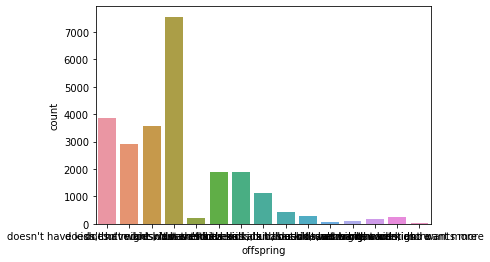

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{"doesn't have kids": 7560,
 "doesn't have kids, and doesn't want any": 1132,
 "doesn't have kids, but might want them": 3875,
 "doesn't have kids, but wants them": 3565,
 "doesn't want kids": 2927,
 'has a kid': 1881,
 'has a kid, and might want more': 231,
 'has a kid, and wants more': 71,
 "has a kid, but doesn't want more": 275,
 'has kids': 1883,
 'has kids, and might want more': 115,
 'has kids, and wants more': 21,
 "has kids, but doesn't want more": 442,
 'might want kids': 181,
 nan: 35558,
 'wants kids': 225}

In [ ]:
count_percent(X[columnName])

{"doesn't have kids": 12.612191785392547,
 "doesn't have kids, and doesn't want any": 1.8884922091354976,
 "doesn't have kids, but might want them": 6.464582429682025,
 "doesn't have kids, but wants them": 5.9474158353074635,
 "doesn't want kids": 4.883053618497881,
 'has a kid': 3.1380334323179078,
 'has a kid, and might want more': 0.38537252677588335,
 'has a kid, and wants more': 0.11844783290514165,
 "has a kid, but doesn't want more": 0.45877681759033734,
 'has kids': 3.1413699909912918,
 'has kids, and might want more': 0.19185212371959562,
 'has kids, and wants more': 0.03503386607053485,
 "has kids, but doesn't want more": 0.737379466817924,
 'might want kids': 0.30195855994127657,
 nan: 59.32067665409896,
 'wants kids': 0.37536285075573056}

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
count(X[columnName])

{"doesn't have kids": 7560,
 "doesn't have kids, and doesn't want any": 1132,
 "doesn't have kids, but might want them": 3875,
 "doesn't have kids, but wants them": 3565,
 "doesn't want kids": 2927,
 'has a kid': 1881,
 'has a kid, and might want more': 231,
 'has a kid, and wants more': 71,
 "has a kid, but doesn't want more": 275,
 'has kids': 1883,
 'has kids, and might want more': 115,
 'has kids, and wants more': 21,
 "has kids, but doesn't want more": 442,
 'might want kids': 181,
 'rather not say': 35558,
 'wants kids': 225}

In [ ]:
count_percent(X[columnName])

{"doesn't have kids": 12.612191785392547,
 "doesn't have kids, and doesn't want any": 1.8884922091354976,
 "doesn't have kids, but might want them": 6.464582429682025,
 "doesn't have kids, but wants them": 5.9474158353074635,
 "doesn't want kids": 4.883053618497881,
 'has a kid': 3.1380334323179078,
 'has a kid, and might want more': 0.38537252677588335,
 'has a kid, and wants more': 0.11844783290514165,
 "has a kid, but doesn't want more": 0.45877681759033734,
 'has kids': 3.1413699909912918,
 'has kids, and might want more': 0.19185212371959562,
 'has kids, and wants more': 0.03503386607053485,
 "has kids, but doesn't want more": 0.737379466817924,
 'might want kids': 0.30195855994127657,
 'rather not say': 59.32067665409896,
 'wants kids': 0.37536285075573056}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 7560,
 1.0: 1132,
 2.0: 3875,
 3.0: 3565,
 4.0: 2927,
 5.0: 1881,
 6.0: 231,
 7.0: 71,
 8.0: 275,
 9.0: 1883,
 10.0: 115,
 11.0: 21,
 12.0: 442,
 13.0: 181,
 14.0: 35558,
 15.0: 225}

## *Columna Pets (categórica)*

In [ ]:
columnName = 'pets'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

19919


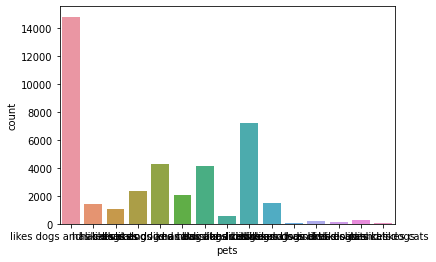

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'dislikes cats': 122,
 'dislikes dogs': 44,
 'dislikes dogs and dislikes cats': 196,
 'dislikes dogs and has cats': 81,
 'dislikes dogs and likes cats': 240,
 'has cats': 1406,
 'has dogs': 4134,
 'has dogs and dislikes cats': 552,
 'has dogs and has cats': 1474,
 'has dogs and likes cats': 2333,
 'likes cats': 1063,
 'likes dogs': 7223,
 'likes dogs and dislikes cats': 2029,
 'likes dogs and has cats': 4313,
 'likes dogs and likes cats': 14813,
 nan: 19919}

In [ ]:
count_percent(X[columnName])

{'dislikes cats': 0.20353007907644055,
 'dislikes dogs': 0.07340429081445397,
 'dislikes dogs and dislikes cats': 0.3269827499916586,
 'dislikes dogs and has cats': 0.13513062627206301,
 'dislikes dogs and likes cats': 0.40038704080611254,
 'has cats': 2.3456007473891427,
 'has dogs': 6.896666777885289,
 'has dogs and dislikes cats': 0.9208901938540589,
 'has dogs and has cats': 2.459043742284208,
 'has dogs and likes cats': 3.892095692502753,
 'likes cats': 1.7733809349037404,
 'likes dogs': 12.049981648927297,
 'likes dogs and dislikes cats': 3.384938774148343,
 'likes dogs and has cats': 7.195288779153182,
 'likes dogs and likes cats': 24.712221814420605,
 nan: 33.230456107570646}

In [ ]:
def extract_pets(x, pet):
  if pd.isna(x):
    return False
  palabras = x.split(' ')
  if (palabras[0] == 'has' or palabras[0] == 'likes') and (palabras[1] == pet):
    return True
  elif (len(palabras)==5 and (palabras[3] == 'has' or palabras[3] == 'likes') and palabras[4] == pet):
    return True
  else:
    return False


In [ ]:
X['dogs'] = X[columnName].apply(lambda x:extract_pets(x, 'dogs'))
X['cats'] = X[columnName].apply(lambda x:extract_pets(x, 'cats'))
X.drop(columns=['pets'], inplace=True)
X

,offspring,last_online,location,state,job,white,hispanic / latin,Ethnicity: rather not say,other,native american,indian,middle eastern,black,asian,pacific islander,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,dogs,cats
0,2,12,174,2,19,0,0,0,0,0,0,0,0,0,0,25,0,4,10,0,2,1,3,22,75,20000,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,True,True
1,2,12,117,2,8,1,0,0,0,0,0,0,0,0,0,31,3,2,6,2,2,1,3,35,70,80000,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,True,True
2,14,12,154,2,14,0,0,1,0,0,0,0,0,0,0,12,2,4,0,10,2,1,0,38,68,20000,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",False,True
3,4,12,16,2,18,1,0,0,0,0,0,0,0,0,0,25,2,4,17,10,2,1,3,23,71,20000,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,False,True
4,14,12,154,2,0,0,0,0,0,0,0,0,0,0,0,9,0,4,3,1,2,1,3,29,66,20000,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,9,12,117,2,16,0,0,1,0,0,0,0,0,0,0,9,0,4,3,8,2,0,3,59,62,20000,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...,True,False
59938,0,12,154,2,6,0,0,0,0,0,0,0,0,0,0,25,3,2,3,4,2,1,3,24,72,20000,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camer

In [ ]:
count(X['dogs'])

{False: 23071, True: 36871}

In [ ]:
count_percent(X['dogs'])

{False: 38.488872576824264, True: 61.511127423175736}

In [ ]:
count(X['cats'])

{False: 34219, True: 25723}

In [ ]:
count_percent(X['cats'])

{False: 57.086850622268194, True: 42.913149377731806}

In [ ]:
columnName = 'dogs'
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 23071, 1.0: 36871}

In [ ]:
columnName = 'cats'
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 34219, 1.0: 25723}

## *Columna Religion (categórica)*

In [ ]:
columnName = 'religion'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

20223


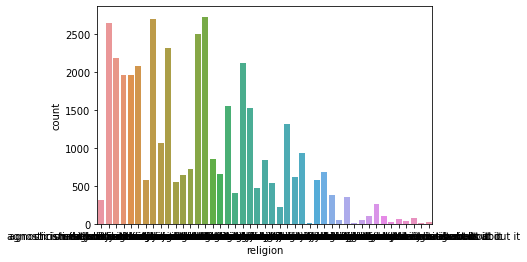

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'agnosticism': 2724,
 'agnosticism and laughing about it': 2496,
 'agnosticism and somewhat serious about it': 642,
 'agnosticism and very serious about it': 314,
 'agnosticism but not too serious about it': 2636,
 'atheism': 2175,
 'atheism and laughing about it': 2074,
 'atheism and somewhat serious about it': 848,
 'atheism and very serious about it': 570,
 'atheism but not too serious about it': 1318,
 'buddhism': 403,
 'buddhism and laughing about it': 466,
 'buddhism and somewhat serious about it': 359,
 'buddhism and very serious about it': 70,
 'buddhism but not too serious about it': 650,
 'catholicism': 1064,
 'catholicism and laughing about it': 726,
 'catholicism and somewhat serious about it': 548,
 'catholicism and very serious about it': 102,
 'catholicism but not too serious about it': 2318,
 'christianity': 1957,
 'christianity and laughing about it': 373,
 'christianity and somewhat serious about it': 927,
 'christianity and very serious about it': 578,
 'christianit

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'Religion: rather not say')

In [ ]:
'''
Religion: rather not to say: NIVEL 0
Diferent religion: NIVEL 0
'X': NIVEL 2
'X and laughing about it': NIVEL 1
'X and somewhat serious about it': NIVEL 2
'X and very serious about it': NIVEL 3
'X but not too serious about it': NIVEL 1
'''

def extract_religion(x, religion):
  palabras = x.split(' ')
  if (palabras[0] != religion or palabras[0] == 'Religion:'):
    return 0
  elif(len(palabras) == 1 or palabras[2] == 'somewhat'):
    return 2
  elif(palabras[2] == 'laughing' or palabras[2] == 'not'):
    return 1
  elif(palabras[2] == 'very'):
    return 3

In [ ]:
tiposReligion = set()
for el in X[columnName]:
  tipo = el.split(' ')[0]
  if tipo != 'Religion:':
    tiposReligion.add(tipo)
tiposReligion

{'agnosticism',
 'atheism',
 'buddhism',
 'catholicism',
 'christianity',
 'hinduism',
 'islam',
 'judaism',
 'other'}

In [ ]:
for tipo in tiposReligion:
  X[tipo] = X[columnName].apply(lambda x:extract_religion(x, tipo))

X.drop(columns=[columnName], inplace=True)
X

,cats,dogs,offspring,last_online,location,state,job,white,hispanic / latin,Ethnicity: rather not say,other,native american,indian,middle eastern,black,asian,pacific islander,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,atheism,islam,buddhism,hinduism,catholicism,agnosticism,christianity,judaism
0,1,1,2,12,174,2,19,0,0,0,0,0,0,0,0,0,0,25,0,4,10,0,2,1,3,22,75,20000,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,0,0,0,0,0,3,0,0
1,1,1,2,12,117,2,8,1,0,0,0,0,0,0,0,0,0,31,3,2,6,2,2,1,3,35,70,80000,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,0,0,0,0,0,1,0,0
2,1,0,14,12,154,2,14,0,0,1,0,0,0,0,0,0,0,12,2,4,0,10,2,1,0,38,68,20000,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",0,0,0,0,0,0,0,0
3,1,0,4,12,16,2,18,1,0,0,0,0,0,0,0,0,0,25,2,4,17,10,2,1,3,23,71,20000,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,0,0,0,0,0,0,0,0
4,1,1,14,12,154,2,0,0,0,0,0,0,0,0,0,0,0,9,0,4,3,1,2,1,3,29,66,20000,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,0,1,9,12,117,2,16,0,0,1,0,0,0,0,0,0,0,9,0,4,3,8,2,0,3,59,62,20000,cancer and it&rsquo;s fun to think about,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...,0,0,0,0,1,0,0,0
59938,1,1,0,12,154,2,6,0,0,0,0,0,0,0,0,0,0,25,3,2,3,4,2,1,3,24,72,20000,leo but it doesn&rsquo;t matter,no,english (fluently),i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses hea

In [ ]:
for columnName in tiposReligion:
  column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
  ], remainder = 'passthrough');

  columns = X.columns
  columns = columns.drop(columnName)
  columns = np.append([columnName], columns)

  X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)
  print(count(X[columnName]))

{0.0: 52957, 2.0: 3023, 1.0: 3392, 3.0: 570}
{0.0: 59803, 3.0: 13, 2.0: 70, 1.0: 56}
{0.0: 52200, 2.0: 3536, 1.0: 3673, 3.0: 533}
{0.0: 57994, 1.0: 1116, 2.0: 762, 3.0: 70}
{0.0: 59492, 1.0: 271, 3.0: 14, 2.0: 165}
{0.0: 55184, 2.0: 1612, 1.0: 3044, 3.0: 102}
{3.0: 314, 1.0: 5132, 0.0: 51130, 2.0: 3366}
{0.0: 54155, 2.0: 2884, 1.0: 2325, 3.0: 578}
{0.0: 56844, 1.0: 2198, 2.0: 878, 3.0: 22}


## *Columna Sign (categórica)*

In [ ]:
columnName = 'sign'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

11055


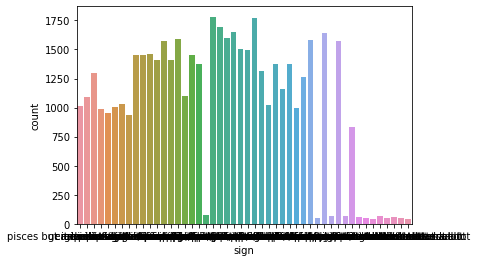

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{'aquarius': 954,
 'aquarius and it matters a lot': 63,
 'aquarius and it&rsquo;s fun to think about': 1503,
 'aquarius but it doesn&rsquo;t matter': 1406,
 'aries': 996,
 'aries and it matters a lot': 47,
 'aries and it&rsquo;s fun to think about': 1573,
 'aries but it doesn&rsquo;t matter': 1373,
 'cancer': 1092,
 'cancer and it matters a lot': 63,
 'cancer and it&rsquo;s fun to think about': 1597,
 'cancer but it doesn&rsquo;t matter': 1454,
 'capricorn': 833,
 'capricorn and it matters a lot': 45,
 'capricorn and it&rsquo;s fun to think about': 1376,
 'capricorn but it doesn&rsquo;t matter': 1319,
 'gemini': 1013,
 'gemini and it matters a lot': 62,
 'gemini and it&rsquo;s fun to think about': 1782,
 'gemini but it doesn&rsquo;t matter': 1453,
 'leo': 1159,
 'leo and it matters a lot': 66,
 'leo and it&rsquo;s fun to think about': 1692,
 'leo but it doesn&rsquo;t matter': 1457,
 'libra': 1098,
 'libra and it matters a lot': 52,
 'libra and it&rsquo;s fun to think about': 1649,
 'li

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
def extract_signo(x):
  if x == 'rather not say':
    return x
  else:
    return x.split(' ')[0]

In [ ]:
X[columnName] = X[columnName].apply(extract_signo)
X

,judaism,christianity,agnosticism,catholicism,hinduism,buddhism,other,islam,atheism,cats,dogs,offspring,last_online,location,state,job,white,hispanic / latin,Ethnicity: rather not say,native american,indian,middle eastern,black,asian,pacific islander,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,0,0,3,0,0,0,0,0,0,1,1,2,12,174,2,19,0,0,0,0,0,0,0,0,0,25,0,4,10,0,2,1,3,22,75,20000,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,0,0,1,0,0,0,0,0,0,1,1,2,12,117,2,8,1,0,0,0,0,0,0,0,0,31,3,2,6,2,2,1,3,35,70,80000,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,0,0,0,0,0,0,0,0,0,1,0,14,12,154,2,14,0,0,1,0,0,0,0,0,0,12,2,4,0,10,2,1,0,38,68,20000,pisces,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,0,0,0,0,0,0,0,0,0,1,0,4,12,16,2,18,1,0,0,0,0,0,0,0,0,25,2,4,17,10,2,1,3,23,71,20000,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,0,0,0,0,0,0,0,0,0,1,1,14,12,154,2,0,0,0,0,0,0,0,0,0,0,9,0,4,3,1,2,1,3,29,66,20000,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,0,0,0,1,0,0,0,0,0,0,1,9,12,117,2,16,0,0,1,0,0,0,0,0,0,9,0,4,3,8,2,0,3,59,62,20000,cancer,no,english,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59938,0,0,2,0,0,0,0,0,0,1,1,0,12,154,2,6,0,0,0,0,0,0,0,0,0,25,3,2,3,4,2,1,3,24,72,20000,leo,no,english (fluently),i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...

In [ ]:
count(X[columnName])

{'aquarius': 3926,
 'aries': 3989,
 'cancer': 4206,
 'capricorn': 3573,
 'gemini': 4310,
 'leo': 4374,
 'libra': 4207,
 'pisces': 3946,
 'rather not say': 11055,
 'sagittarius': 3942,
 'scorpio': 4134,
 'taurus': 4140,
 'virgo': 4140}

In [ ]:
count_percent(X[columnName])

{'aquarius': 6.549664675853325,
 'aries': 6.65476627406493,
 'cancer': 7.016782890127122,
 'capricorn': 5.9607620700010004,
 'gemini': 7.190283941143106,
 'leo': 7.297053818691401,
 'libra': 7.018451169463814,
 'pisces': 6.583030262587168,
 'rather not say': 18.44282806713156,
 'sagittarius': 6.5763571452404,
 'scorpio': 6.896666777885289,
 'taurus': 6.906676453905441,
 'virgo': 6.906676453905441}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 3926,
 1.0: 3989,
 2.0: 4206,
 3.0: 3573,
 4.0: 4310,
 5.0: 4374,
 6.0: 4207,
 7.0: 3946,
 8.0: 11055,
 9.0: 3942,
 10.0: 4134,
 11.0: 4140,
 12.0: 4140}

## *Columna Smokes (categórica)*

In [ ]:
columnName = 'smokes'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

5511


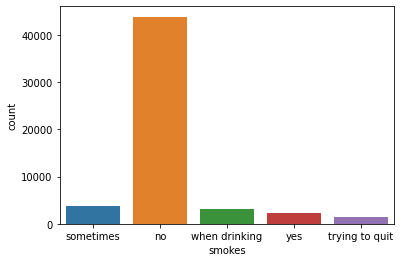

In [ ]:
sns.countplot(x = columnName, data = X)

In [ ]:
count(X[columnName])

{nan: 5511,
 'no': 43894,
 'sometimes': 3787,
 'trying to quit': 1480,
 'when drinking': 3039,
 'yes': 2231}

In [ ]:
count_percent(X[columnName])

{nan: 9.19388742451036,
 'no': 73.2274532047646,
 'sometimes': 6.317773848053118,
 'trying to quit': 2.4690534183043606,
 'when drinking': 5.069900904207401,
 'yes': 3.7219312001601548}

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
count(X[columnName])

{'no': 43894,
 'rather not say': 5511,
 'sometimes': 3787,
 'trying to quit': 1480,
 'when drinking': 3039,
 'yes': 2231}

In [ ]:
count_percent(X[columnName])

{'no': 73.2274532047646,
 'rather not say': 9.19388742451036,
 'sometimes': 6.317773848053118,
 'trying to quit': 2.4690534183043606,
 'when drinking': 5.069900904207401,
 'yes': 3.7219312001601548}

In [ ]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
], remainder = 'passthrough');

columns = X.columns
columns = columns.drop(columnName)
columns = np.append([columnName], columns)

X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)

count(X[columnName])

{0.0: 43894, 1.0: 5511, 2.0: 3787, 3.0: 1480, 4.0: 3039, 5.0: 2231}

## *Columna Speaks (categórica)*

In [ ]:
columnName = 'speaks'

In [ ]:
print(len(indexes_of_empty_values(X[columnName])))

50


In [ ]:
count(X[columnName])

{'english': 21826,
 'english (fluently), spanish (poorly), french (poorly)': 93,
 'english, french, c++': 4,
 'english, german (poorly)': 82,
 'english (fluently), chinese (okay)': 430,
 'english, spanish (okay)': 655,
 'english (fluently)': 6628,
 'english (fluently), sign language (poorly)': 78,
 'english (fluently), spanish (okay)': 1917,
 'english (fluently), c++ (fluently), german (poorly), french (poorly)': 1,
 'english (fluently), spanish (fluently), italian (okay)': 38,
 'english, spanish (poorly)': 609,
 'english (fluently), tagalog (fluently), japanese (okay)': 2,
 'english (fluently), other (fluently), thai (poorly)': 2,
 'english (fluently), spanish (fluently)': 1288,
 'english, russian': 101,
 'english (fluently), spanish (poorly)': 2059,
 'english (fluently), dutch (fluently), lisp (fluently), spanish (okay), german (okay)': 1,
 'english, indonesian (fluently)': 2,
 'english (okay), french (poorly), spanish (poorly), c++ (okay)': 1,
 'english, spanish (poorly), portuguese

In [ ]:
set_new_values_on_indexes(X[columnName], indexes_of_empty_values(X[columnName]), 'rather not say')

In [ ]:
tiposSpeaks = set()
for el in extract_types(X[columnName]):
  tipo = el.split(' ')
  if len(tipo)==1:
    tiposSpeaks.add(tipo[0])
  elif len(tipo)==3:
    tiposSpeaks.add(tipo[0]+' '+ tipo[1])
tiposSpeaks

{'afrikaans',
 'albanian',
 'ancient greek',
 'arabic',
 'basque',
 'belarusan',
 'bengali',
 'breton',
 'bulgarian',
 'c++',
 'catalan',
 'cebuano',
 'chechen',
 'chinese',
 'croatian',
 'czech',
 'danish',
 'dutch',
 'english',
 'esperanto',
 'estonian',
 'farsi',
 'finnish',
 'french',
 'frisian',
 'georgian',
 'german',
 'greek',
 'gujarati',
 'hawaiian',
 'hebrew',
 'hindi',
 'hungarian',
 'icelandic',
 'ilongo',
 'indonesian',
 'irish',
 'italian',
 'japanese',
 'khmer',
 'korean',
 'latin',
 'latvian',
 'lisp',
 'lithuanian',
 'malay',
 'maori',
 'mongolian',
 'norwegian',
 'occitan',
 'other',
 'persian',
 'polish',
 'portuguese',
 'rather not',
 'romanian',
 'rotuman',
 'russian',
 'sanskrit',
 'serbian',
 'sign language',
 'slovak',
 'spanish',
 'swahili',
 'swedish',
 'tagalog',
 'tamil',
 'thai',
 'tibetan',
 'turkish',
 'ukrainian',
 'urdu',
 'vietnamese',
 'welsh',
 'yiddish'}

In [ ]:
def extract_speaks(x, tipo):
  tipos = x.split(', ')
  for el in tipos:
    subel = el.split(' ')
    if(el == tipo or len(subel)==1):
      return el==tipo
    elif len(subel)==2:
      return (subel[0] == tipo)
    else:
      return ((subel[0]+' '+subel[1]) == tipo)

In [ ]:
for tipo in tiposSpeaks:
  X[tipo] = X[columnName].apply(lambda x:extract_speaks(x, tipo))

X.drop(columns=[columnName], inplace=True)
X

,smokes,sign,judaism,christianity,agnosticism,catholicism,hinduism,buddhism,other,islam,atheism,cats,dogs,offspring,last_online,location,state,job,white,hispanic / latin,Ethnicity: rather not say,native american,indian,middle eastern,black,asian,pacific islander,education,drugs,drinks,diet,body_type,orientation,sex,status,age,height,income,essay0,essay1,...,french,rotuman,gujarati,greek,frisian,vietnamese,italian,albanian,latvian,belarusan,japanese,spanish,english,sign language,swedish,farsi,russian,hindi,tibetan,basque,occitan,slovak,chechen,hebrew,croatian,swahili,cebuano,latin,polish,tamil,german,irish,urdu,estonian,breton,serbian,persian,czech,hawaiian,sanskrit
0,2,4,0,0,3,0,0,0,False,0,0,1,1,2,12,174,2,19,0,0,0,0,0,0,0,0,0,25,0,4,10,0,2,1,3,22,75,20000,about me: i would love to think that i was so...,currently working as an international agent fo...,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,2,0,0,1,0,0,0,False,0,0,1,1,2,12,117,2,8,1,0,0,0,0,0,0,0,0,31,3,2,6,2,2,1,3,35,70,80000,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,7,0,0,0,0,0,0,False,0,0,1,0,14,12,154,2,14,0,0,1,0,0,0,0,0,0,12,2,4,0,10,2,1,0,38,68,20000,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,7,0,0,0,0,0,0,False,0,0,1,0,4,12,16,2,18,1,0,0,0,0,0,0,0,0,25,2,4,17,10,2,1,3,23,71,20000,i work in a library and go to school. . .,reading things written by old dead people,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,0,0,0,False,0,0,1,1,14,12,154,2,0,0,0,0,0,0,0,0,0,0,9,0,4,3,1,2,1,3,29,66,20000,hey how's it going? currently vague on the pro...,work work work work + play,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,0,2,0,0,0,1,0,0,False,0,0,0,1,9,12,117,2,16,0,0,1,0,0,0,0,0,0,9,0,4,3,8,2,0,3,59,62,20000,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59938,0,5,0,0,2,0,0,0,False,0,0,1,1,0,12,154,2,6,0,0,0,0,0,0,0,0,0,25,3,2,3,4,2,1,3,24,72,20000,i'm nick. i never know what to write about mys...,currently finishing school for film production...,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [ ]:
for columnName in tiposSpeaks:
  column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("ordinal", sklearn.preprocessing.OrdinalEncoder(), [columnName])
  ], remainder = 'passthrough');

  columns = X.columns
  columns = columns.drop(columnName)
  columns = np.append([columnName], columns)

  X = pd.DataFrame(column_transformer.fit_transform(X), columns=columns)
  print(count(X[columnName]))

{0.0: 59942}
{0.0: 59941, 1.0: 1}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59941, 1.0: 1}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59892, 1.0: 50}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59940, 1.0: 2}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{1.0: 59888, 0.0: 54}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 59942}
{0.0: 599

## Guardado del resultado

In [ ]:
guardar(X, nombre='preprocesamiento_sin_texto')

In [ ]:
X = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/preprocesamiento_sin_texto.csv", sep=",")
X

# **Estudio y preprocesamiento de texto**


## *Procesamiento casillas vacías*

Se pone un String vacío en las casillas nulas

In [ ]:
for i in range(0, len(X)):
  for j in range(0,10):
    if(pd.isna(X['essay'+str(j)][i])):
      X['essay'+str(j)][i] = ''
X[['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']]

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,i think love is a two romantic travel together...,"i've a 9-5 job. on my spare time, i love to da...",,,"movies: my sassy girl food: korean, japanese, ...",,,,,"you're mature, good hearted, sincere, and seri..."
1,,"career, and meeting new people",,,,,,,,
2,i'm a midwest transplant who one day realized ...,i take care of people for a living. i'm a doct...,entertaining and making people laugh laughing ...,i'm going to ask some friends and get back to ...,to say i'm a dabbler would only be fair. favor...,- comfy shoes - the ability to call my parents...,the day after tomorrow,two consecutive days off is a relatively new c...,i love dissecting cadavers. don't knock it til...,you haven't yet thought of a reason not to or ...
3,one love im still in a figure out the world mo...,find out,botany(major) outdoorsy stuff i can cast spell...,how dirty my clothes are and possibly my smile,anything by steinbeck. most music samba jazz f...,family instrumentals amazing click of friends,"the world at,large and how i can change it for...","working or making music, art, and fighting crime.",i like to jugg,your funny thats it.
4,i tell you when i see you =) to much to say.,don't have one yet.,"soccer, tennis, dancing, clubbing.",my smile i guess.,"persian food ofcourse, house music, pulp ficti...",,,,,you like someone who's going to be respectful ...
...,...,...,...,...,...,...,...,...,...,...
59937,"a friend calls me the ""princess of paradox""......","lately, when i'm not working i'm enjoying as m...","connecting the seemingly unconnectable, discer...",whatever you notice,here's one of my favorite poems: don't drink ...,assuming the economy stays vaguely functional ...,"staying in the present, being in alignment wit...","coming out of yoga, watching a movie, writing ...",that i enjoy cleaning out the lint filter on a...,"you are a positive, adventurous person who thi..."
59938,"don't like tv or stuff, prefer people, music, ...",like everyone else in this city i work at a st...,guessing your myers briggs type and eating app...,,music - i won't try to impress you with my fav...,genuine people jamming the sun spontaneity ser...,why the world works the way it does. why schoo...,adventurous,"i'm not good with dates, details or deadlines.",you want to make a new friend in the city.
59939,im an east coaster that has gotten accustomed ...,working... going to tahoe... still exploring t...,parallel parking making the best of a situatio...,my smile/dimple,,snowboard sports sandwiches laughter philadelp...,my next adventure,out having the best time of my life,i've been known to love romantic comedies..,you want to have a good time and check out lif...
59940,"born in berkeley, raised in marin. moved to ne...",expecting surprises.,directions.,i've never asked anyone what their first impre...,anything from the 1960's-1970's.,my family. canned soup. my ipod. art. hot ...,why i have a tendency to over-think things.,"i'm not usually aware when it's friday, honestly.",won't be written here.,you're so inclined. and are equally apprehensi...


## Ordenar columnas con Truncated SVD

¡Atención! Este apartado puede tardar más de 24h en ejecutarse.

Acerca de mí / Auto resumen
About me: essay0

Objetivos actuales / aspiraciones
Current goals or aspirations: essay1

Mi regla de oro / Mis rasgos
My golden rule / my traits: essay2

Probablemente podría ganarte en / Talento
My talents: essay3

La última serie que he visto / Hobbies
The last show I have watch / my hobbies: essay4

Un día perfecto / Momentos
My perfect day / my favourite moments: essay5

Yo valoro / Necesito
I love when / I need to: essay6

La cosa más privada que estoy dispuesto a admitir / Secretos
The most private thing I am willing to admit / My secrets: essay7

Lo que realmente estoy buscando / Citas
What I am really looking for / Dates: essay8

Other : essay9



In [ ]:
temas = [
  "About me",
  "Current goals or aspirations",
  "My golden rule, my traits",
  "My talents",
  "The last show I have watch, my hobbies",
  "My perfect day, my favourite moments",
  "I love when, I need to",
  "The most private thing I am willing to admit, my secrets",
  "What I am really looking for, dates"]

In [ ]:
corpus = []
for i in range(0,len(X)):
  for j in range(0,10): #Recorre las columns de essay
    if (X['essay'+str(j)][i]!=''):
      corpus.append(X['essay'+str(j)][i])

In [ ]:
vectorizer = TfidfVectorizer().fit(corpus)

corpus_vectorized = vectorizer.transform(corpus)

svd = TruncatedSVD(n_components=10, random_state=1337).fit(corpus_vectorized)

In [ ]:
def adapt_to_compare_similarity (frase):
  aux = vectorizer.transform([frase])
  return svd.transform(aux)[0]

def comparar_texto_con_temas(texto, temas):
  probabilidades = []
  for tema in temas:
    sim = cosine_similarity(adapt_to_compare_similarity(texto).reshape(1,-1), adapt_to_compare_similarity(tema).reshape(1,-1))
    probabilidad = sim[0][0]
    probabilidades.append(probabilidad)
  return probabilidades

Ordenar las columnas de essay con su tema correspondiente

In [ ]:
class Casilla:

    def __init__(self, texto, temas):
        self.texto = texto
        if(texto!=''):
          self.probabilidades = comparar_texto_con_temas(texto, temas)
        else:
          self.probabilidades = [sys.float_info.min]*10


In [ ]:
def extraer_mayor_probabilidad(casilla, temas_asignados):
  maximo = sys.float_info.min
  tema = 9
  for i in range (0, 9): #Para cada tema se comprueba si es el que tiene mayor probabilidad, solo si no está asignado ya
    if i not in temas_asignados:
      if casilla.probabilidades[i]>=maximo:
        maximo = casilla.probabilidades[i]
        tema = i
  return (tema, maximo)

def extraer_columna_mayor_probabilidad(casillas, columnas_asignadas, temas_asignados):
  maximo = sys.float_info.min
  indice = -1
  tema = 9
  for i in range(0, 10): #Para cada columna essay se comprueba si tiene la mayor probabilidad, solo si no está asignada ya
    if i not in columnas_asignadas:
      tema_i, max_i = extraer_mayor_probabilidad(casillas[i], temas_asignados)
      if max_i >= maximo:
        maximo = max_i
        indice = i
        tema = tema_i

  return (indice, tema)

In [ ]:
warnings.filterwarnings("ignore")
for fila in range(0, len(X)):
  casillas = []
  for columna in ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']:
    casillas.append(  Casilla(X[columna][fila], temas))

  if(fila%100==0):
    print("FILA", fila)

  columnas_asignadas = []
  temas_asignados = []

  while len(columnas_asignadas)<len(casillas):
    indice, tema = extraer_columna_mayor_probabilidad(casillas, columnas_asignadas, temas_asignados)
    columnas_asignadas.append(indice)
    temas_asignados.append(tema)

    X['essay'+str(tema)][fila] = casillas[indice].texto

warnings.filterwarnings("default")
X[['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']]

In [ ]:
guardar(X, nombre='columnas_essay_ordenadas')

In [ ]:
X_columnas_ordenadas = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/columnas_essay_ordenadas.csv", sep=",")
X_columnas_ordenadas['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']

## Ordenar columnas con Truncated SVD paralelo

In [ ]:
temas = [
  "About me",
  "Current goals or aspirations",
  "My golden rule, my traits",
  "My talents",
  "The last show I have watch, my hobbies",
  "My perfect day, my favourite moments",
  "I love when, I need to",
  "The most private thing I am willing to admit, my secrets",
  "What I am really looking for, dates"]

In [ ]:
corpus = []
for i in range(0,len(X)):
  for j in range(0,10): #Recorre las columns de essay
    if (X['essay'+str(j)][i]!=''):
      corpus.append(X['essay'+str(j)][i])

In [ ]:
vectorizer = TfidfVectorizer().fit(corpus)

corpus_vectorized = vectorizer.transform(corpus)

svd = TruncatedSVD(n_components=10, random_state=1337).fit(corpus_vectorized)

In [ ]:
def adapt_to_compare_similarity (frase):
  aux = vectorizer.transform([frase])
  return svd.transform(aux)[0]

def comparar_texto_con_temas(texto, temas):
  probabilidades = []
  for tema in temas:
    sim = cosine_similarity(adapt_to_compare_similarity(texto).reshape(1,-1), adapt_to_compare_similarity(tema).reshape(1,-1))
    probabilidad = sim[0][0]
    probabilidades.append(probabilidad)
  return probabilidades

Ordenar las columnas de essay con su tema correspondiente

In [ ]:
class Casilla:

    def __init__(self, texto, temas):
        self.texto = texto
        if(texto!=''):
          self.probabilidades = comparar_texto_con_temas(texto, temas)
        else:
          self.probabilidades = [sys.float_info.min]*10


In [ ]:
def extraer_mayor_probabilidad(casilla, temas_asignados):
  maximo = sys.float_info.min
  tema = 9
  for i in range (0, 9): #Para cada tema se comprueba si es el que tiene mayor probabilidad, solo si no está asignado ya
    if i not in temas_asignados:
      if casilla.probabilidades[i]>=maximo:
        maximo = casilla.probabilidades[i]
        tema = i
  return (tema, maximo)

def extraer_columna_mayor_probabilidad(casillas, columnas_asignadas, temas_asignados):
  maximo = sys.float_info.min
  indice = -1
  tema = 9
  for i in range(0, 10): #Para cada columna essay se comprueba si tiene la mayor probabilidad, solo si no está asignada ya
    if i not in columnas_asignadas:
      tema_i, max_i = extraer_mayor_probabilidad(casillas[i], temas_asignados)
      if max_i >= maximo:
        maximo = max_i
        indice = i
        tema = tema_i

  return (indice, tema)

In [ ]:
def ordenar_fila(fila):
  resultado = ['']*10
  casillas = []
  for columna in ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']:
    casillas.append(  Casilla(X[columna][fila], temas))

  if(fila%100==0):
    print("FILA", fila)

  columnas_asignadas = []
  temas_asignados = []
  
  while len(columnas_asignadas)<len(casillas):
    indice, tema = extraer_columna_mayor_probabilidad(casillas, columnas_asignadas, temas_asignados)
    columnas_asignadas.append(indice)
    temas_asignados.append(tema)

    resultado[tema] = casillas[indice].texto
  return resultado

In [ ]:
warnings.filterwarnings("ignore")

pool_obj = multiprocessing.Pool()

result = pool_obj.map(ordenar_fila, range(0, len(X)))

warnings.filterwarnings("default")

FILA 0
FILA 7500
FILA 100
FILA 7600
FILA 200
FILA 7700
FILA 300
FILA 7800
FILA 400
FILA 7900
FILA 500
FILA 8000
FILA 600
FILA 8100
FILA 700
FILA 8200
FILA 800
FILA 8300
FILA 900
FILA 8400
FILA 1000
FILA 8500
FILA 1100
FILA 8600
FILA 1200
FILA 8700
FILA 1300
FILA 8800
FILA 1400
FILA 8900
FILA 1500
FILA 9000
FILA 1600
FILA 9100
FILA 1700
FILA 9200
FILA 1800
FILA 9300
FILA 1900
FILA 9400
FILA 2000
FILA 9500
FILA 2100
FILA 9600
FILA 2200
FILA 9700
FILA 2300
FILA 9800
FILA 2400
FILA 9900
FILA 2500
FILA 10000
FILA 2600
FILA 10100
FILA 2700
FILA 10200
FILA 2800
FILA 10300
FILA 2900
FILA 10400
FILA 3000
FILA 10500
FILA 3100
FILA 10600
FILA 3200
FILA 10700
FILA 3300
FILA 10800
FILA 3400
FILA 10900
FILA 3500
FILA 11000
FILA 3600
FILA 11100
FILA 3700
FILA 11200
FILA 3800
FILA 11300
FILA 3900
FILA 11400
FILA 4000
FILA 11500
FILA 4100
FILA 11600
FILA 4200
FILA 11700
FILA 4300
FILA 11800
FILA 4400
FILA 11900
FILA 4500
FILA 12000
FILA 4600
FILA 12100
FILA 4700
FILA 12200
FILA 4800
FILA 12300
FILA 490

In [ ]:
result

In [ ]:
X_columnas_ordenadas = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/columnas_essay_ordenadas.csv", sep=",")
X_columnas_ordenadas

HTTPError: ignored

## Extracción de los temas más importantes de cada columna con LDA

In [ ]:
n_samples = 20000
n_features = 10000
n_components = 10
n_top_words = 10

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
for j in ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']:
  corpus = []
  for i in range(0,len(X)):
    corpus.append(X[j][i])

  tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
  tf = tf_vectorizer.fit_transform(corpus)

  lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50., random_state=1337)
  lda.fit(tf)

  for k in range(0, n_components):
    X[j+'.'+str(k)] = [0.0]*len(X)
  
  for i in range(0,len(X)):
    probabilities = lda.transform(tf[i])[0]
    for k in range(0, n_components):
      X[j+'.'+str(k)][i] = probabilities[k]
X

In [ ]:
X.drop(columns = ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'], inplace=True)

In [ ]:
guardar(X, nombre='temas_extraidos')

In [ ]:
X_preprocesado = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/preprocesado.csv", sep=",")
X_preprocesado

# **Visualización con reducción dimensional**

## Importación de los datos preprocesados

In [ ]:
X_preprocesado = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/preprocesado.csv", sep=",")
X_preprocesado

,irish,urdu,afrikaans,georgian,albanian,latvian,estonian,icelandic,finnish,spanish,japanese,dutch,belarusan,basque,czech,norwegian,thai,ancient greek,swahili,chechen,danish,welsh,cebuano,bulgarian,polish,persian,frisian,farsi,ilongo,mongolian,esperanto,hawaiian,russian,arabic,greek,sign language,sanskrit,german,serbian,indonesian,...,essay6.0,essay6.1,essay6.2,essay6.3,essay6.4,essay6.5,essay6.6,essay6.7,essay6.8,essay6.9,essay7.0,essay7.1,essay7.2,essay7.3,essay7.4,essay7.5,essay7.6,essay7.7,essay7.8,essay7.9,essay8.0,essay8.1,essay8.2,essay8.3,essay8.4,essay8.5,essay8.6,essay8.7,essay8.8,essay8.9,essay9.0,essay9.1,essay9.2,essay9.3,essay9.4,essay9.5,essay9.6,essay9.7,essay9.8,essay9.9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591426,0.010004,0.010000,0.010003,0.110003,0.010001,0.228559,0.010000,0.010001,0.010002,0.014290,0.014287,0.014288,0.014289,0.014286,0.014286,0.014287,0.014291,0.014286,0.871411,0.012502,0.012507,0.012500,0.012500,0.350549,0.012500,0.012502,0.374395,0.012500,0.187544,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.020012,0.020004,0.020002,0.020007,0.020011,0.020000,0.819964,0.020000,0.020000,0.020001,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025000,0.464594,0.025000,0.025000,0.025000,0.025000,0.335404,0.025000,0.025002,0.025000,0.001450,0.001449,0.097484,0.035953,0.001449,0.001449,0.001449,0.807569,0.001449,0.050298,0.001191,0.161365,0.274332,0.001191,0.238281,0.054257,0.230511,0.001191,0.036491,0.001191,0.007692,0.007692,0.085841,0.007693,0.007693,0.007692,0.852617,0.007693,0.007693,0.007693
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050011,0.050011,0.050001,0.050012,0.050000,0.050003,0.549941,0.050000,0.050000,0.050018,0.020001,0.219525,0.020000,0.020000,0.020000,0.620469,0.020003,0.020000,0.020000,0.020002,0.005264,0.005263,0.005264,0.689157,0.005266,0.005263,0.268733,0.005264,0.005263,0.005263,0.014286,0.014286,0.014288,0.014286,0.163167,0.722541,0.014286,0.014286,0.014286,0.014289
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016667,0.016671,0.016667,0.016667,0.016667,0.016667,0.849990,0.016670,0.016667,0.016668,0.033347,0.033333,0.033333,0.033333,0.699973,0.033334,0.033340,0.033340,0.033333,0.033334,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.205717,0.055383,0.059720,0.078093,0.002632,0.377843,0.002632,0.035351,0.047057,0.135572,0.003227,0.036759,0.003227,0.344780,0.003226,0.051432,0.043077,0.003227,0.003226,0.507

In [ ]:
#X_preprocesado = pd.DataFrame(X_preprocesado.iloc[:100, :]) 

## Análisis de Componentes Iniciales (PAC)

In [ ]:
pca = PCA(n_components=2, random_state=1337).fit(X_preprocesado)
X_PAC = pca.transform(X_preprocesado)
X_PAC

array([[-3.49279995e+04, -2.84222478e+01],
       [-3.49279994e+04, -2.84623457e+01],
       [ 5.07200053e+03, -2.75466072e+01],
       ...,
       [ 5.07199764e+03,  1.24665725e+02],
       [ 5.07200058e+03, -2.75644973e+01],
       [-1.49279995e+04, -2.79993321e+01]])

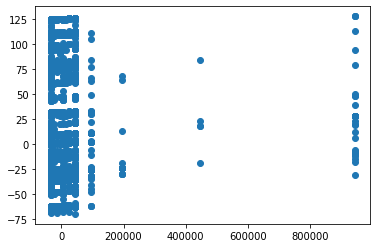

<Figure size 720x720 with 0 Axes>

In [ ]:
representar(X_PAC)

In [ ]:
guardar(pd.DataFrame(X_PAC), nombre='pac')

## T-SNE

### *T-SNE varias perplexity*

In [ ]:
rangoInferior = 5
rangoSuperior = 51
step = 5

In [ ]:
warnings.filterwarnings("ignore")

for perplexity in range(rangoInferior,rangoSuperior,step):
  tsne = TSNE(n_components=2, perplexity=perplexity, verbose=False, n_jobs=-1, learning_rate='auto', init='pca')
  X_TSNE = tsne.fit_transform(X_preprocesado)
  
  plt.figure(figsize=(7, 7))+
  plt.title('perplexity=' + str(perplexity))
  plt.scatter(X_TSNE[:,0], X_TSNE[:,1], cmap="brg")
  plt.xticks([]), plt.yticks([]) # desactivacion de las marcas de los ejes

warnings.filterwarnings("default")

### *T-SNE perplexity concreta*

In [ ]:
perplexity = 20  #@param {type: "slider", min: 5, max: 50, step: 1}


tsne = TSNE(n_components=2, perplexity=perplexity, verbose=True, n_jobs=-1, learning_rate='auto', init='pca')
X_TSNE = tsne.fit_transform(X_preprocesado)
X_TSNE

In [ ]:
representar(X_TSNE)

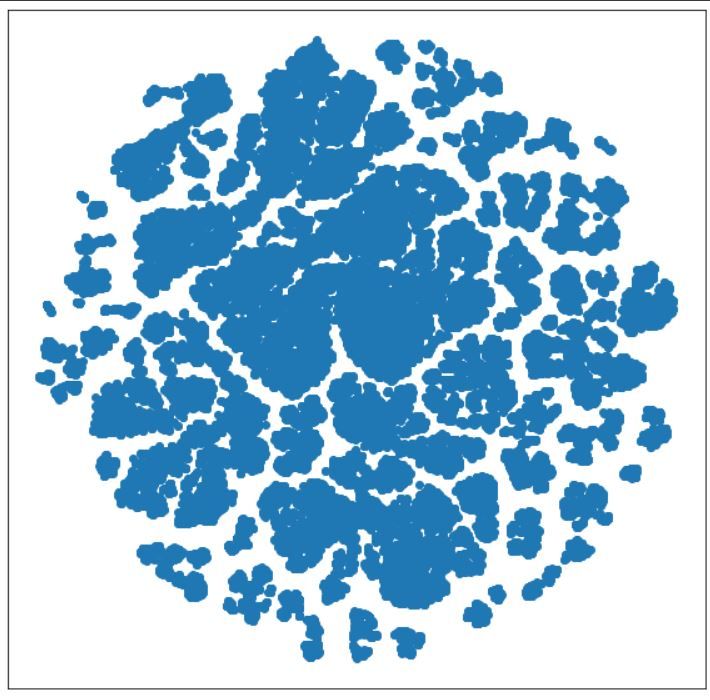

In [ ]:
guardar(pd.DataFrame(X_TSNE), nombre='t-sne')

## Isomap

In [ ]:
n_neighbors = 30  #@param {type: "slider", min: 5, max: 50, step: 1}

isomap = Isomap(n_neighbors=n_neighbors, n_components=2)
X_ISOMAP = isomap.fit_transform(X_preprocesado)
X_ISOMAP

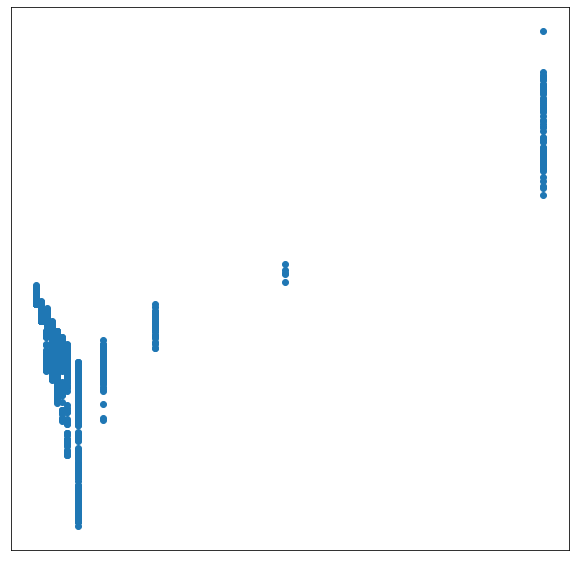

In [ ]:
representar(X_ISOMAP)

In [ ]:
guardar(pd.DataFrame(X_ISOMAP), nombre='isomap')

# **Clustering**

## Importación de la reducción dimensional

In [ ]:
X_PAC = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/pac.csv", sep=",").to_numpy()
X_PAC

In [ ]:
X_TSNE = pd.read_csv("https://machine.eu-central-1.linodeobjects.com/t-sne.csv", sep=",").to_numpy()
X_TSNE

## K_Means

### *Optimización de hiperparámetros*

In [ ]:
aux = [-1]*(len(X_preprocesado)-1) + [0]
ps = PredefinedSplit(aux)

In [ ]:
parameters = {
  'n_clusters': np.arange(4,41,3),
  'max_iter': np.arange(200,401,50),
  'n_init': np.arange(5, 21, 5)
}

kmeans = KMeans(random_state=1337)
gs = GridSearchCV(kmeans, parameters, scoring=silhouette, return_train_score=True, verbose=False, n_jobs=-1, cv=ps)
gs.fit(X_preprocesado)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')

In [ ]:
params = pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')['params'][0]
params

### *Entrenamiento del modelo optimizado*

In [ ]:
n_clusters = 14  #@param {type: "slider", min: 5, max: 50, step: 1}
max_iter = 1  #@param {type: "slider", min: 1, max: 10, step: 1}
n_init = 10 #@param {type: "slider", min: 5, max: 50, step: 1}

In [ ]:
n_clusters = params['n_clusters']
max_iter = params['max_iter']
n_init = params['n_init']

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, n_init=10, random_state=1337)

labels_kmeans = kmeans.fit_predict(X_preprocesado)
labels_kmeans

In [ ]:
print('Silhouette: ', silhouette_score(X_preprocesado, labels_kmeans)) # Se ha ejecutado en local y el resultado obtenido ha sido aproximadamente de 0.93

### *Visualización del resultado*

In [ ]:
representar(X_TSNE, labels_kmeans) #Representación usando la reducción dimensional de T-SNE

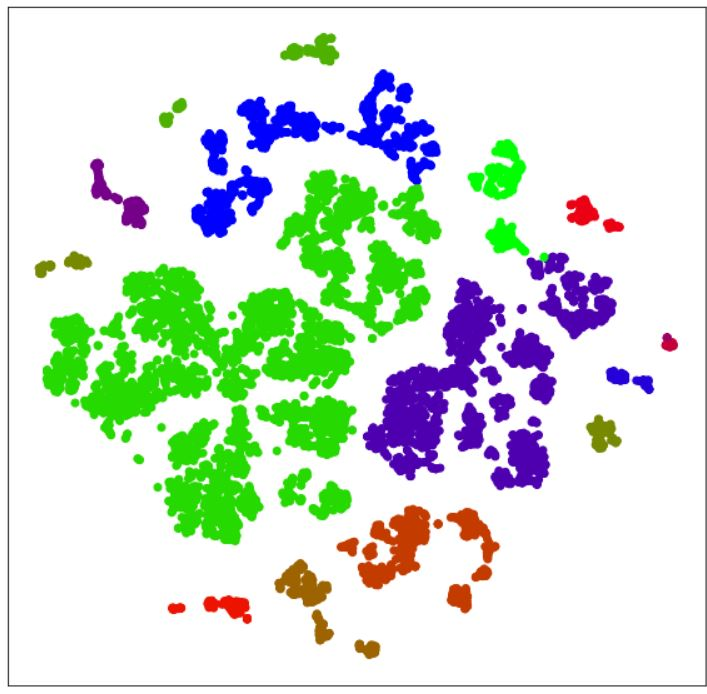

In [ ]:
representar(X_PAC, labels_kmeans) #Representación usando la reducción dimensional de T-PAC

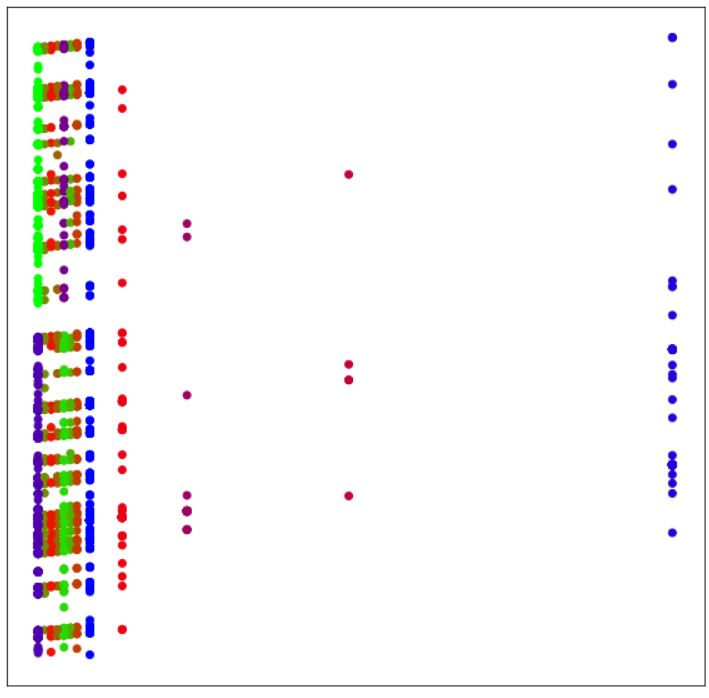

## Clustering Jerárquico Aglomerativo

### *Optimización de hiperparámetros*

In [ ]:
aux = [-1]*(len(X_preprocesado)-1) + [0]
ps = PredefinedSplit(aux)

In [ ]:
parameters = {
  'n_clusters': np.arange(4,41,1)
}

cja = AgglomerativeClustering()
gs = GridSearchCV(cja, parameters, scoring=silhouette, return_train_score=True, verbose=False, n_jobs=-1, cv=ps)
gs.fit(X_preprocesado)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')

In [ ]:
params = pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')['params'][0]
params

### *Entrenamiento del modelo optimizado*

In [ ]:
n_clusters = 6  #@param {type: "slider", min: 1, max: 100, step: 2}

In [ ]:
n_clusters = params['n_clusters']

In [ ]:
ac = AgglomerativeClustering(n_clusters = n_clusters).fit(X_preprocesado)
labels_clusteringAglomerativo = ac.labels_

### *Visualización del resultado*

In [ ]:
representar(X_TSNE, labels_clusteringAglomerativo) #Representación usando la reducción dimensional de T-SNE

In [ ]:
representar(X_PAC, labels_clusteringAglomerativo) #Representación usando la reducción dimensional de T-PAC

## DBSCAN

### *Cálculo de la distancía máxima existente*

Puesto que el hiper-parámetro  ε  se basa en la distancia, para ajustarlo, es interesante conocer la distancía máxima existente:

In [ ]:
distancias = kneighbors_graph(X_preprocesado, 149, mode='distance')

In [ ]:
distancias.todense().flatten().max()

### *Optimización de hiperparámetros*

In [ ]:
aux = [-1]*(len(X_preprocesado)-1) + [0]
ps = PredefinedSplit(aux)

In [ ]:
parameters = {
  'eps': np.arange(10,101,10),
  'min_samples': np.arange(4,41,3),
  'metric': ['manhattan', 'euclidean', 'l1']
}

dbs = DBSCAN(n_jobs=-1)
gs = GridSearchCV(dbs, parameters, scoring=silhouette, return_train_score=True, verbose=False, n_jobs=-1, cv=ps)
gs.fit(X_preprocesado)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')

In [ ]:
params = pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')['params'][0]
params

### *Entrenamiento del modelo optimizado*

In [ ]:
eps = 85  #@param {type: "slider", min: 50, max: 1000, step: 5}
min_samples = 75  #@param {type: "slider", min: 50, max: 1000, step: 5}
metric = "manhattan" #@param ["manhattan", "euclidean", "l1"]

In [ ]:
eps = params['eps']
min_samples = params['min_samples']
metric = params['metric']

In [ ]:
modelo_dbs = DBSCAN(eps=eps, min_samples=min_samples, metric='manhattan', n_jobs=-1)

In [ ]:
labels_dbs = modelo_dbs.fit_predict(X_preprocesado)

In [ ]:
print('Silhouette: ', silhouette_score(X_preprocesado, labels_dbs))

### *Visualización del resultado*

In [ ]:
representar(X_TSNE, labels_dbs) #Representación usando la reducción dimensional de T-SNE

In [ ]:
representar(X_PAC, labels_dbs) #Representación usando la reducción dimensional de T-PAC

## Spectral Clustering

### *Optimización de hiperparámetros*

In [ ]:
aux = [-1]*(len(X_preprocesado)-1) + [0]
ps = PredefinedSplit(aux)

In [ ]:
parameters = {
  'n_clusters': np.arange(4,41,1),
  'affinity': ['nearest_neighbors', 'rbf']
}

sc = SpectralClustering(n_jobs=-1, random_state=1337)
gs = GridSearchCV(sc, parameters, scoring=silhouette, return_train_score=True, verbose=False, n_jobs=-1, cv=ps)
gs.fit(X_preprocesado)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_affinity,param_n_clusters,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
0,14.918639,0.0,0.010115,0.0,nearest_neighbors,4,"{'affinity': 'nearest_neighbors', 'n_clusters'...",NaN,NaN,NaN,1,-0.214,-0.214,0.0


In [ ]:
params = pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')['params'][0]
params

{'affinity': 'nearest_neighbors', 'n_clusters': 4}

### *Entrenamiento del modelo optimizado*

In [ ]:
n_clusters = 6  #@param {type: "slider", min: 1, max: 40, step: 1}
affinity = "nearest_neighbors" #@param ["nearest_neighbors", "rbf"]

In [ ]:
n_clusters = params['n_clusters']
affinity = params['affinity']

In [ ]:
sc = SpectralClustering(n_clusters=n_clusters, affinity=affinity, n_jobs=-1, random_state=1337).fit(X_preprocesado)
labels_spectral = sc.labels_

### *Visualización del resultado*

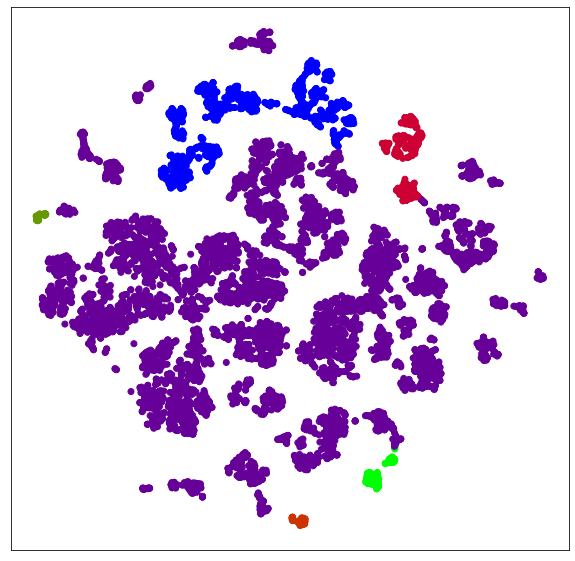

In [ ]:
representar(X_TSNE, labels_spectral) #Representación usando la reducción dimensional de T-SNE

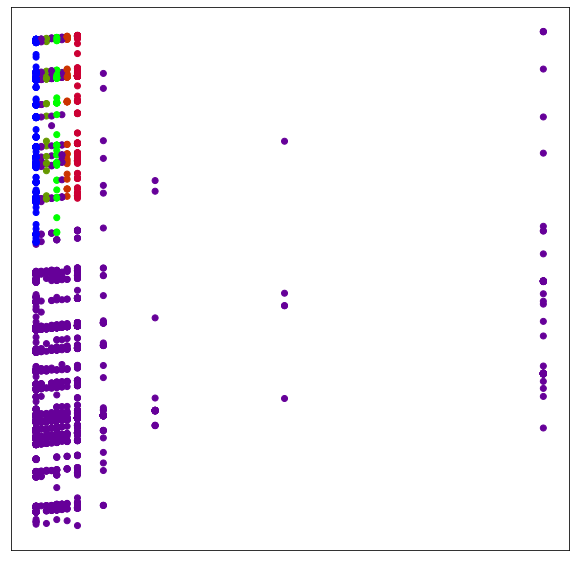

In [ ]:
representar(X_PAC, labels_spectral) #Representación usando la reducción dimensional de T-PAC

# **Intentos descartados**

## Lematización y Steaming

### *Pruebas*

In [ ]:
count_vectorizer = CountVectorizer()

In [ ]:
corpus = [
    "El miedo es el camino hacia el lado oscuro, el miedo lleva a la ira, la ira lleva al odio, el odio lleva al sufrimiento, el sufrimiento al lado oscuro.",
    "La guerra de las galaxias inspiro la frase anterior",
    "George Lucas creo la Guerra de las Galaxias"
]

X = count_vectorizer.fit_transform(corpus)

print(X.toarray())

[[3 0 1 0 0 6 1 0 0 0 0 1 0 2 2 2 0 3 0 2 2 2 2]
 [0 1 0 0 1 0 0 1 1 0 1 0 1 0 2 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0]]


In [ ]:
corpus = [
    "El miedo es el camino hacia el lado oscuro, el miedo lleva a la ira, la ira lleva al odio, el odio lleva al sufrimiento, el sufrimiento al lado oscuro.",
    "La guerra de las galaxias inspiro la frase anterior",
    "George Lucas creo la Guerra de las Galaxias"
]
count_vectorizer.fit([corpus[0]])
count_vectorizer.fit([corpus[1]])
count_vectorizer.fit([corpus[2]])
X = count_vectorizer.transform(corpus)

print(X.toarray())

[[0 0 0 0 0 2 0 0]
 [0 1 1 0 1 2 1 0]
 [1 1 1 1 1 1 1 1]]


In [ ]:
X.shape

(3, 8)

In [ ]:
print(count_vectorizer.get_feature_names())

['creo', 'de', 'galaxias', 'george', 'guerra', 'la', 'las', 'lucas']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
english_stopwords = stopwords.words('english')
count_vectorizer = CountVectorizer(stop_words = english_stopwords)

In [ ]:
ps = PorterStemmer()

frase = """cars are blue"""
palabras = word_tokenize(frase)

palabras = [p for p in palabras if not p in set(english_stopwords)]
for p in palabras:
    print(p, " : ", ps.stem(p))

cars  :  car
blue  :  blue


### *Implementación*

In [ ]:
frase = "La guerra de las galaxias inspiro la frase anterior"
frase

'La guerra de las galaxias inspiro la frase anterior'

In [ ]:
def stem_sentence(frase):
  ps = PorterStemmer()
  english_stopwords = stopwords.words('english')

  palabras = word_tokenize(frase)
  palabras = [p for p in palabras if not p in set(english_stopwords)]
  resultado = ''
  for p in palabras:
    resultado += ps.stem(p) + ' '
  return resultado.strip()

stem_sentence(frase)

'La guerra de la galaxia inspiro la frase anterior'

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lem_sentence_aux(frase): #Lematización por defecto
  ps = PorterStemmer()
  english_stopwords = stopwords.words('english')

  palabras = word_tokenize(frase)
  palabras = [p for p in palabras if not p in set(english_stopwords)]
  resultado = ''
  for p in palabras:
    resultado += wordnet_lemmatizer.lemmatize(p) + ' '
  return resultado.strip()

lem_sentence_aux(frase)

'La guerra de la galaxias inspiro la frase anterior'

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lem_sentence(frase):
  ps = PorterStemmer()
  english_stopwords = stopwords.words('english')

  palabras = word_tokenize(frase)
  palabras = [p for p in palabras if not p in set(english_stopwords)]
  resultado = ''
  for p in palabras:
    aux = wordnet_lemmatizer.lemmatize(p, pos='v')
    aux = wordnet_lemmatizer.lemmatize(aux, pos='a')
    aux = wordnet_lemmatizer.lemmatize(aux, pos='s')
    aux = wordnet_lemmatizer.lemmatize(aux, pos='r')
    resultado += wordnet_lemmatizer.lemmatize(aux, pos='n') + ' '
  return resultado.strip()

In [ ]:
print(lem_sentence_aux(frase))
print(lem_sentence(frase))
print(stem_sentence(frase))
print('')
print(stem_sentence(stem_sentence(stem_sentence(frase))))
frase = 'indifferent indifference indifferentism indifferency romance togethernesses togetherness together walk walking walkaway walks'
print('')
print(lem_sentence_aux(frase))
print(lem_sentence(frase))
print(stem_sentence(frase))
print('')
print(stem_sentence(stem_sentence(stem_sentence(frase))))

La guerra de la galaxias inspiro la frase anterior
La guerra de la galaxias inspiro la frase anterior
La guerra de la galaxia inspiro la frase anterior

La guerra de la galaxia inspiro la frase anterior

indifferent indifference indifferentism indifferency romance togetherness togetherness together walk walking walkaway walk
indifferent indifference indifferentism indifferency romance togetherness togetherness together walk walk walkaway walk
indiffer indiffer indifferent indiffer romanc togeth togeth togeth walk walk walkaway walk

indiff indiff indiff indiff romanc togeth togeth togeth walk walk walkaway walk


## Optimización de T-SNE con los modelos clustering

### *Optimización de hiperparámetros KMEANS*

In [ ]:
aux = [-1]*(len(X_preprocesado)-1) + [0]
ps = PredefinedSplit(aux)

In [ ]:
class KMeans_class(BaseEstimator, TransformerMixin):
  def __init__(self, perplexity=20, n_clusters=14, max_iter=1, n_init=1):
    self.perplexity=perplexity
    self.n_clusters=n_clusters
    self.max_iter=max_iter
    self.n_init=n_init

    self.tsne = TSNE(n_components=2, perplexity=perplexity, verbose=False, n_jobs=-1, learning_rate='auto', init='pca')
    self.model = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=1337)
      
  def fit(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return self.model.fit(X_TSNE)

  def transform(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return self.model.predict(X_TSNE)

  def fit_transform(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    self.model = self.model.fit(X_TSNE)
    return self.transform(X_TSNE)
  
  def score(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return silhouette(self.model, X_TSNE)

In [ ]:
parameters = {
  'perplexity': np.arange(10,101,10),
  'n_clusters': np.arange(4,41,1),
  'max_iter': np.arange(200,401,20),
  'n_init': np.arange(5, 51, 5)
}

parameters = {
  'perplexity': np.arange(10,11,10),
  'n_clusters': np.arange(14,15,1),
  'max_iter': np.arange(1,2,1),
  'n_init': np.arange(5, 6, 5)
}

kmeans = KMeans_class()
gs = GridSearchCV(kmeans, parameters, return_train_score=True, verbose=False, n_jobs=-1, cv=ps)
gs.fit(X_preprocesado)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')

In [ ]:
params = pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')['params'][0]
params

{'max_iter': 1, 'n_clusters': 14, 'n_init': 5, 'perplexity': 10}

### *Optimización de hiperparámetros Clustering Jerárquico Aglomerativo*

In [ ]:
aux = [-1]*(len(X_preprocesado)-1) + [0]
ps = PredefinedSplit(aux)

In [ ]:
class CJA_class(BaseEstimator, TransformerMixin):
  def __init__(self, perplexity=20, n_clusters=14):
    self.perplexity=perplexity
    self.n_clusters=n_clusters

    self.tsne = TSNE(n_components=2, perplexity=perplexity, verbose=False, n_jobs=-1, learning_rate='auto', init='pca')
    self.model = AgglomerativeClustering(n_clusters=n_clusters)
      
  def fit(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return self.model.fit(X_TSNE)

  def transform(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return self.model.predict(X_TSNE)

  def fit_transform(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    self.model = self.model.fit(X_TSNE)
    return self.transform(X_TSNE)
  
  def score(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return silhouette(self.model, X_TSNE)

In [ ]:
parameters = {
  'perplexity': np.arange(10,101,10),
  'n_clusters': np.arange(4,41,1)
}

parameters = {
  'perplexity': np.arange(10,11,10),
  'n_clusters': np.arange(14,15,1)
}

cja = CJA_class()
gs = GridSearchCV(cja, parameters, return_train_score=True, verbose=False, n_jobs=-1, cv=ps)
gs.fit(X_preprocesado)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')

In [ ]:
params = pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')['params'][0]
params

{'max_iter': 1, 'n_clusters': 14, 'n_init': 5, 'perplexity': 10}

### *Optimización de hiperparámetros DBSCAN*

In [ ]:
aux = [-1]*(len(X_preprocesado)-1) + [0]
ps = PredefinedSplit(aux)

In [ ]:
class DBSCAN_class(BaseEstimator, TransformerMixin):
  def __init__(self, perplexity=20, eps=14, min_samples=5, metric='manhattan):
    self.perplexity=perplexity
    self.n_clusters=n_clusters

    self.tsne = TSNE(n_components=2, perplexity=perplexity, verbose=False, n_jobs=-1, learning_rate='auto', init='pca')
    self.model = DBSCAN(eps=eps, min_samples=min_samples, metric='manhattan', n_jobs=-1)
      
  def fit(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return self.model.fit(X_TSNE)

  def transform(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return self.model.predict(X_TSNE)

  def fit_transform(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    self.model = self.model.fit(X_TSNE)
    return self.transform(X_TSNE)
  
  def score(self, X):
    X_TSNE = self.tsne.fit_transform(X)
    return silhouette(self.model, X_TSNE)

In [ ]:
parameters = {
  'perplexity': np.arange(10,101,10),
  'eps': np.arange(10,101,10),
  'min_samples': np.arange(4,41,1),
  'metric': ['manhattan', 'euclidean', 'l1']
}

parameters = {
  'perplexity': np.arange(10,101,10),
  'eps': np.arange(10,101,10),
  'min_samples': np.arange(4,41,1),
  'metric': ['manhattan']
}

dbs = DBSCAN_class()
gs = GridSearchCV(dbs, parameters, return_train_score=True, verbose=False, n_jobs=-1, cv=ps)
gs.fit(X_preprocesado)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')

In [ ]:
params = pd.DataFrame(gs.cv_results_).sort_values('mean_train_score')['params'][0]
params

{'max_iter': 1, 'n_clusters': 14, 'n_init': 5, 'perplexity': 10}

## *Columna Income paralela (fallido)*

In [ ]:
columnName = 'income'

In [ ]:
count(X[columnName])

{-1: 48442,
 20000: 2952,
 30000: 1048,
 40000: 1005,
 50000: 975,
 60000: 736,
 70000: 707,
 80000: 1111,
 100000: 1621,
 150000: 631,
 250000: 149,
 500000: 48,
 1000000: 521}

In [ ]:
def calcular_income (index):
  if(X[columnName][index] == -1):
    return ((X[X['job']==X['job'][index]])[X['income']!=-1])[columnName].mode().mean()
  else:
    return X[columnName][index]

In [ ]:
warnings.filterwarnings("ignore")

pool_obj = multiprocessing.Pool()

result = pool_obj.map(calcular_income, range(0, len(X)))

#X[columnName] = result
#X = aux
warnings.filterwarnings("default")
#X
result

In [ ]:
result

In [ ]:
count(X[columnName])

In [ ]:
count_percent(X[columnName])